In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [3]:
train_data.shape

(6368, 15)

In [4]:
test_data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [5]:
test_data.shape

(3430, 14)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


Clearly we have missing values

In [7]:
train_data.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


- Here we can see minimum selling price is negative which is not a real time value 

In [8]:
# Checking negative values in Selling_price
len(train_data[train_data['Selling_Price'] <= 0])

14

In [9]:
# So first we remove these observations
train_data = train_data[train_data['Selling_Price'] > 0]

In [10]:
len(train_data[train_data['Selling_Price'] <= 0])

0

In [11]:
# Now check missing values
train_data.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

In [12]:
train_data.shape

(6313, 15)

In [13]:
for var in train_data:
    print(f"Unique Values in {var} is {len(train_data[var].unique())}")

Unique Values in Product_id is 6313
Unique Values in Stall_no is 51
Unique Values in instock_date is 5309
Unique Values in Market_Category is 248
Unique Values in Customer_name is 5856
Unique Values in Loyalty_customer is 2
Unique Values in Product_Category is 10
Unique Values in Grade is 4
Unique Values in Demand is 100
Unique Values in Discount_avail is 3
Unique Values in charges_1 is 487
Unique Values in charges_2 (%) is 18
Unique Values in Minimum_price is 4211
Unique Values in Maximum_price is 4588
Unique Values in Selling_Price is 6307


- Some customer has purchased more than 1 products.
- At same time more than one products have got purchased.

# EDA

In [14]:
# Where Some customer has purchased more than 1 products.
train_data_dummy = train_data.copy() 

customers = train_data_dummy.groupby(by = 'Customer_name').size()[train_data_dummy.groupby(by = 'Customer_name').size() > 1].index.tolist()
train_data_dummy.loc[train_data_dummy['Customer_name'].isin(customers)].sort_values("Customer_name")

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
6182,RTRE4EY9HHDVPVG6,38.0,2016-01-06 07:04:35.000,452,1,No,Educational,0,100,0.0,133.0,17.0,3779.0,5332.0,4590.574600
6034,DRPEHYHFQ8KHHZHW,31.0,2015-11-11 15:20:23.000,55,1,Yes,Repair,0,87,0.0,206.0,8.0,3521.0,4645.0,4230.461312
1203,NKCDV7KGEEZHJVJY,31.0,2015-11-20 03:54:49.000,462,Aaryn,No,Home_decor,3,52,0.0,209.0,10.0,2947.0,5074.0,4196.479536
1784,ACCDSY8EHHF5TSKC,15.0,2016-03-21 03:23:09.000,2,Aaryn,Yes,Fashion,1,20,1.0,358.0,16.0,6686.0,11356.0,1377.311674
2722,BDSEJTHGGZH3HSJF,4.0,2014-11-11 14:20:39.000,268,Adrian,No,Pet_care,2,27,0.0,158.0,3.0,1850.0,4707.0,3428.886300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,NKCDU4RZGHFC9JKV,34.0,2015-09-26 13:24:59.000,58,Wynn,Yes,Cosmetics,1,42,0.0,294.0,15.0,3022.0,4113.0,3842.102160
3712,MUGEACY8Z8Y3EDRZ,33.0,2015-09-22 16:19:57.000,451,Yael,No,Technology,0,73,0.0,NaN,10.0,4556.0,6196.0,5960.176200
1341,BRADWZ4K9GN5VCM9,34.0,2015-08-19 21:25:26.000,358,Yael,Yes,Repair,3,78,0.0,223.0,8.0,3942.0,13114.0,8670.241800
4763,NKCDZHF7GVHHGZRJ,35.0,2015-09-24 16:33:15.000,268,Yuri,No,Home_decor,2,90,0.0,291.0,10.0,1069.0,3501.0,2541.152768


In [15]:
# where At same time more than one products have got purchased.
dates = train_data_dummy.groupby(by = 'instock_date').size()[train_data_dummy.groupby(by = 'instock_date').size() > 1].index.tolist()
train_data_dummy.loc[train_data_dummy['instock_date'].isin(dates)].sort_values("instock_date")

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
2402,BDSEJT9UQWHDUBH4,17.0,2014-11-10 19:15:45.000,205,Cameron,No,Technology,0,94,0.0,543.0,6.0,2679.0,3712.0,3686.557952
3057,MBPEJMV5GAY9SZX5,29.0,2014-11-10 19:15:45.000,453,Addison,No,Child_care,0,23,0.0,312.0,13.0,4525.0,6177.0,5655.785100
4199,WATED8HNQGUFBNFT,5.0,2015-01-18 15:23:43.000,23,Evan,No,Fashion,2,61,0.0,389.0,17.0,5155.0,12634.0,9205.633800
286,WATEBYZGFCZPUJAR,45.0,2015-01-18 15:23:43.000,55,Dominic,No,Technology,0,32,0.0,602.0,16.0,3963.0,5451.0,5303.238675
5740,SHOEF9G8EWYMM2AM,39.0,2015-02-07 14:09:26.000,294,Jose,Yes,Hospitality,2,2,NaN,323.0,NaN,2097.0,5843.0,4296.140343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,LJGEATZREKFCWH8G,25.0,2016-03-30 20:51:58.000,235,Tressa,No,Repair,0,19,0.0,286.0,5.0,2035.0,6880.0,4745.255427
4838,SHTEDZXRFQJKNKAU,29.0,2016-03-30 20:54:54.000,460,Zamiya,No,Technology,3,93,0.0,559.0,9.0,280.0,478.0,924.827904
459,SHTEDWTVVGDRVTNX,16.0,2016-03-30 20:54:54.000,55,Zarya,No,Home_decor,0,38,0.0,235.0,17.0,2454.0,4875.0,3895.965675
2771,TSHEDFADFYUN663X,22.0,2016-03-30 20:55:26.000,24,Aiven,No,Educational,0,56,0.0,155.0,6.0,5439.0,8150.0,6909.077088


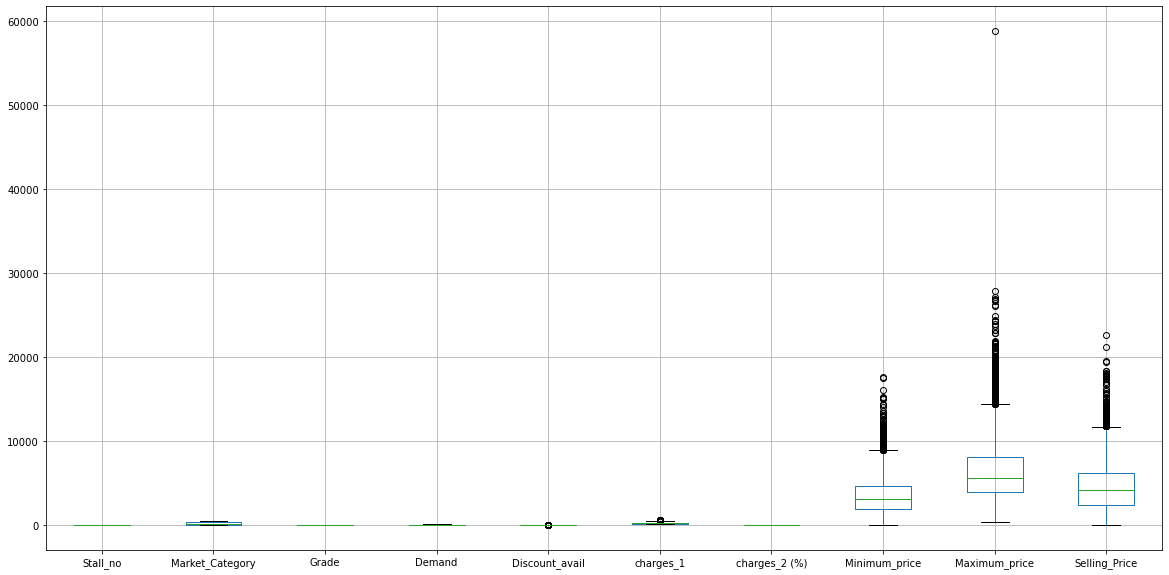

In [16]:
fig = plt.figure(figsize = (20,10))
train_data.boxplot()

> Clearly we have outliers for numeric variables like charges_1, minimum_values, maximunm_values, Selling_price. So to compare selling price for each category we will consider median instead of mean.

In [17]:
# fig = plt.figure(figsize = (45,20))
# for i,var in enumerate(train_data.columns):
#     if i >2:
#         ax = fig.add_subplot(2,5,i+1)
#         sns.boxplot(y = var,data = train_data,ax = ax)

In [18]:
# categorical variables
categorical_variables = train_data.select_dtypes("O").columns.tolist()
categorical_variables

['Product_id',
 'instock_date',
 'Customer_name',
 'Loyalty_customer',
 'Product_Category']

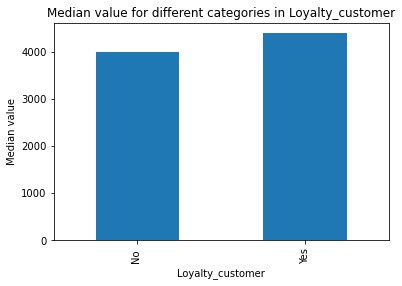

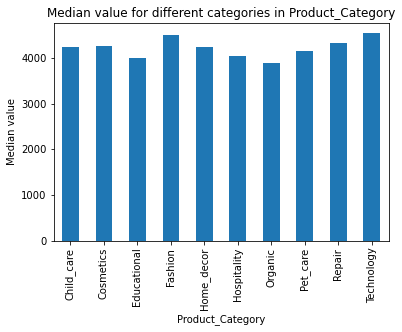

In [19]:
#fig =plt.figure(figsize = (10,10))
for var in categorical_variables:
    if var not in ['Product_id','instock_date','Customer_name',]:
        train_data.groupby(var).median()["Selling_Price"].plot(kind = 'bar')
        plt.ylabel("Median value")
        plt.xlabel(var)
        plt.title(f"Median value for different categories in {var}")
        plt.show()

- If customer is not loyal means if they bargain or do something else then they bought the product in less money which is fact.
- Fashion and techno products are little costly compared to others.

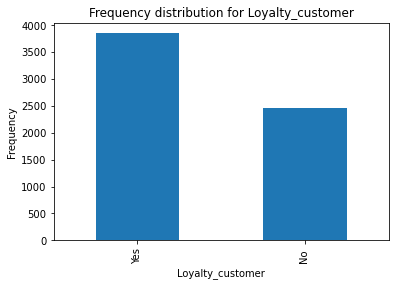

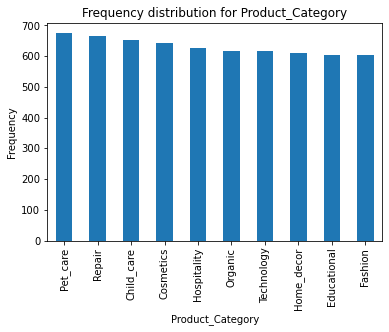

In [20]:
# See the frequency distribution of the categorical variables
for var in categorical_variables:
    if var not in ['Product_id','instock_date','Customer_name',]:
        train_data[var].value_counts().plot(kind = 'bar')
        plt.ylabel("Frequency")
        plt.xlabel(var)
        plt.title(f"Frequency distribution for {var}")
        plt.show()

- One thing we can notice here is the no. of loyal customers is quite high. It menas less no. of customers used tricks to buy the products.

In [21]:
# Actually in this stage we can assume that customer_id and customer_name will not create any impact on selling price
# But instock_time may impact selling price
# We dont have missing values for categorical columns.

# Numeric variable

In [22]:
numeric_variables = [var for var in train_data.columns if train_data[var].dtype != 'O']
numeric_variables

['Stall_no',
 'Market_Category',
 'Grade',
 'Demand',
 'Discount_avail',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'Selling_Price']

## Discrete variable

In [23]:
# We will take those variables as discrete whose unique values are < 52
discrete_variables = [var for var in numeric_variables if len(train_data[var].unique()) < 52]
discrete_variables

['Stall_no', 'Grade', 'Discount_avail', 'charges_2 (%)']

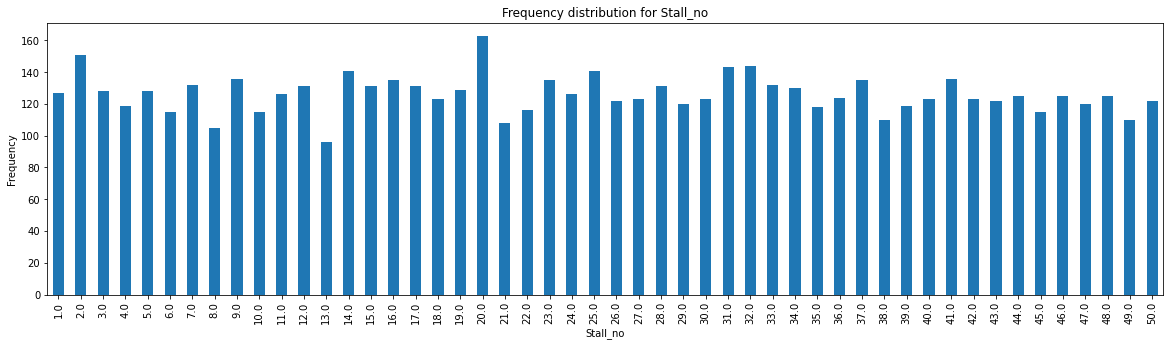

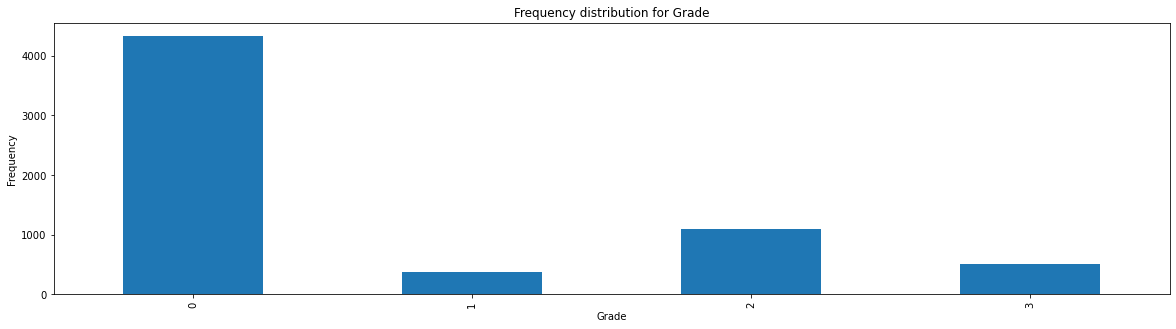

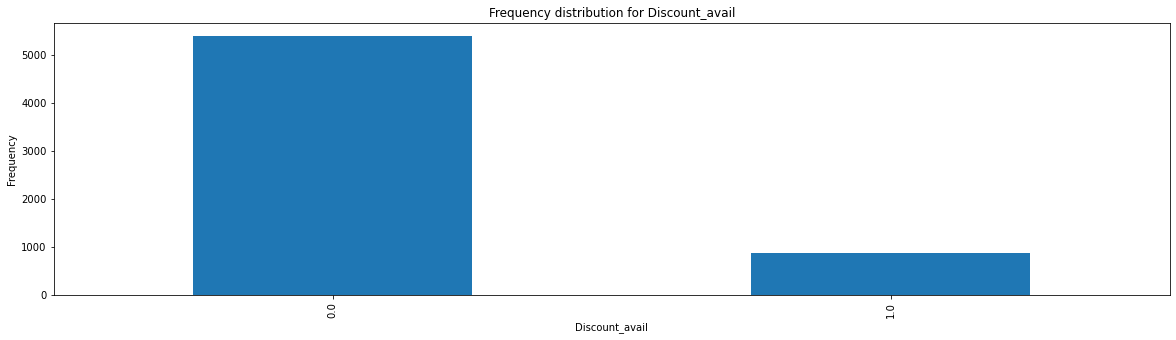

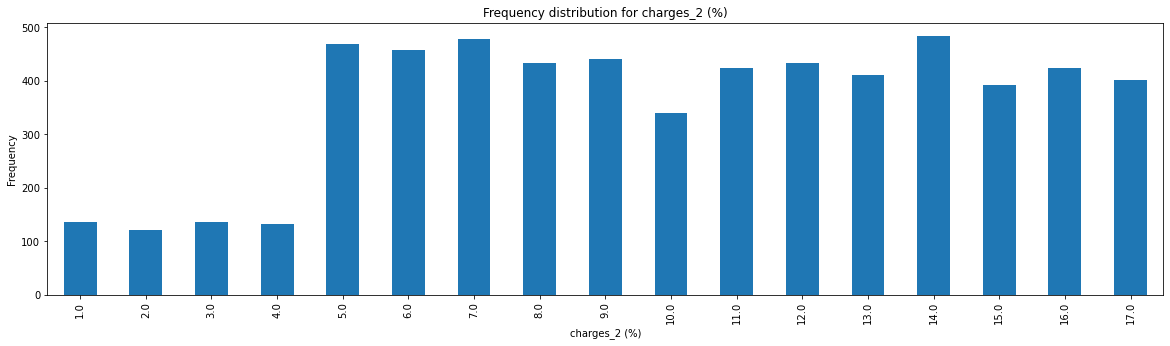

In [24]:
# Check the frequency distribution of discrete variables
for var in  discrete_variables:
    fig = plt.figure(figsize= (20,5))
    train_data.groupby(var).size().plot(kind = "bar")
    plt.ylabel("Frequency")
    plt.xlabel(var)
    plt.title(f"Frequency distribution for {var}")
    plt.show()

- We can see that most of the products are of grade 0 and grade 3 products are quite low.
- For most of the products discounts are not available. So one question may come that what is the confusion matrix for discount available v/s. loyalty customer.
- We can notice that the procts having less than 4% charge2 are quite low.
- for stall_no. frequency is quite same.

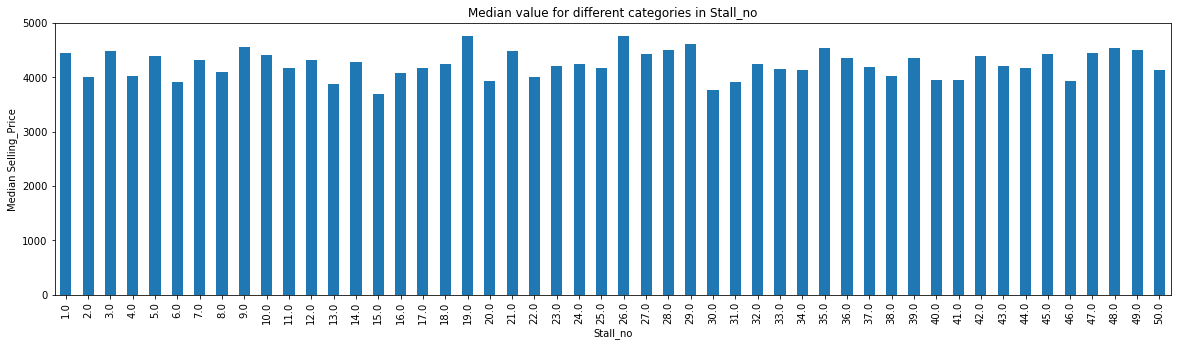

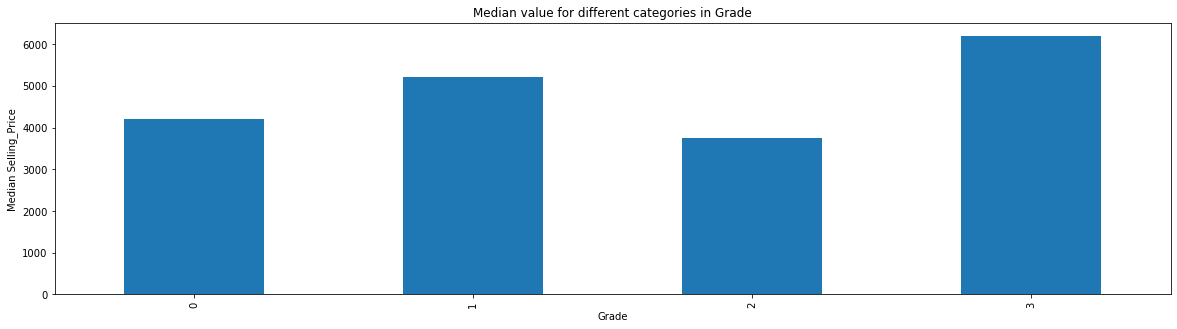

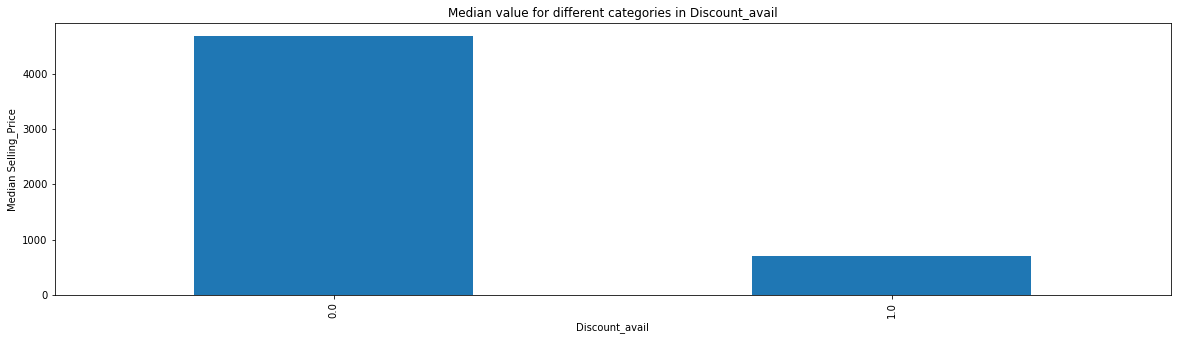

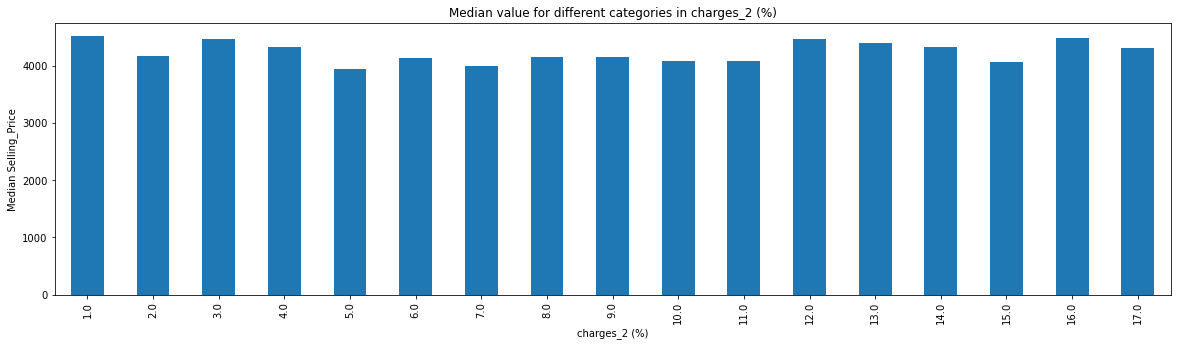

In [25]:
# check median sales price for discrete variables
for var in discrete_variables:
    fig = plt.figure(figsize= (20,5))
    train_data.groupby(var).median()['Selling_Price'].plot(kind = 'bar')
    plt.ylabel("Median Selling_Price")
    plt.xlabel(var)
    plt.title(f"Median value for different categories in {var}")
    plt.show()

- Here we can notice that values of 0-grade products are low and also we have seen it has been sold most and we can also see grade-1 and grade-3 products are costly so they have been sold less.
- discounts are available for low cost products and also they have been sold less.
- median selling price for different chares_2 are more or less same, little high for charges_2 from 1 to 4 but those are sold in less number(may be there is another reason).
- Selling price of stall_no.s are quite same.

#### Grade v/s. discount

   Discount_avail  Grade  Count
0             0.0      0   3687
1             0.0      1    335
2             0.0      2    919
3             0.0      3    455
4             1.0      0    627
5             1.0      1     43
6             1.0      2    165
7             1.0      3     45


C:\Users\Chayan\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


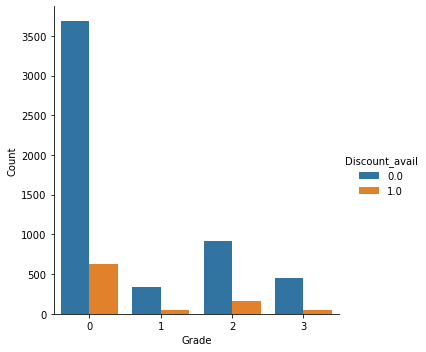

In [26]:
## Grade wise discount count
df = pd.DataFrame(train_data.groupby(["Discount_avail","Grade"]).size(),columns = ["Count"]).reset_index()
print(df)
sns.factorplot(x = "Grade", y = "Count",data = df, hue = "Discount_avail",kind = "bar")

   Discount_avail  Grade  Selling_Price
0             0.0      0    4654.781824
1             0.0      1    5667.494400
2             0.0      2    4242.473280
3             0.0      3    6988.022272
4             1.0      0     712.528245
5             1.0      1    1013.616628
6             1.0      2     593.083575
7             1.0      3    1111.339116


C:\Users\Chayan\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


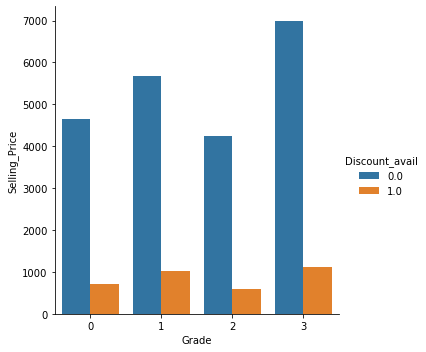

In [27]:
# Grade wise difference in selling price considering discount availability.
df = pd.DataFrame(train_data.groupby(["Discount_avail","Grade"]).median()["Selling_Price"],columns = ["Selling_Price"]).reset_index()
print(df)
sns.factorplot(x = "Grade", y = "Selling_Price",data = df, hue = "Discount_avail",kind = "bar")

- One thing we can notice from above 2 graphs is grade-1 and grade-3 products have less discount and the discount has been given for costly products in these grades compared to others. So people have bought these products less.
- discount has been given most for grade-0 producs and also the price is quite low for these products. So people have bought it most.

#### discount_avail v/s. charges_2

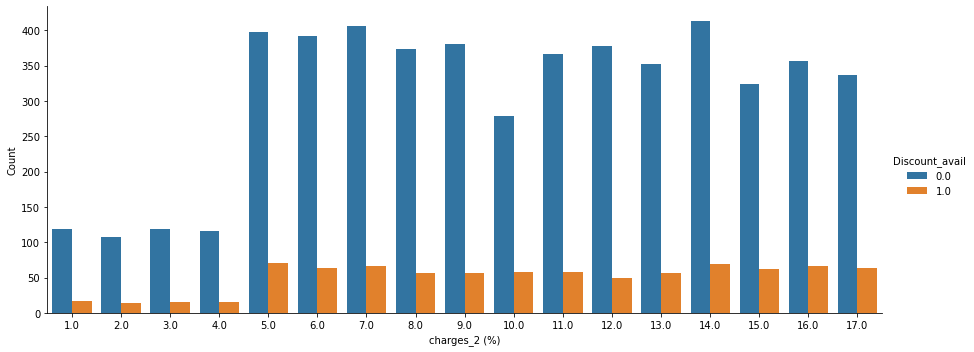

In [28]:
## We need to check how many products are available for discount and what is the charges_2 distribution for them

df = pd.DataFrame(train_data.groupby(["Discount_avail","charges_2 (%)"]).size(),columns = ["Count"]).reset_index()
sns.factorplot(x = "charges_2 (%)", y = "Count", data = df, hue = "Discount_avail", kind = "bar" ,aspect=20/8)

> Here we can notice that for products having charges_2 less than 5% have less number of discount availabilities. So in freq distribution for charges_2 we found that these type of products are sold in less number. So we now found the reason behind it.

> Here we can see a clear trend that the products for which discounts are available are sold most monotonocally.

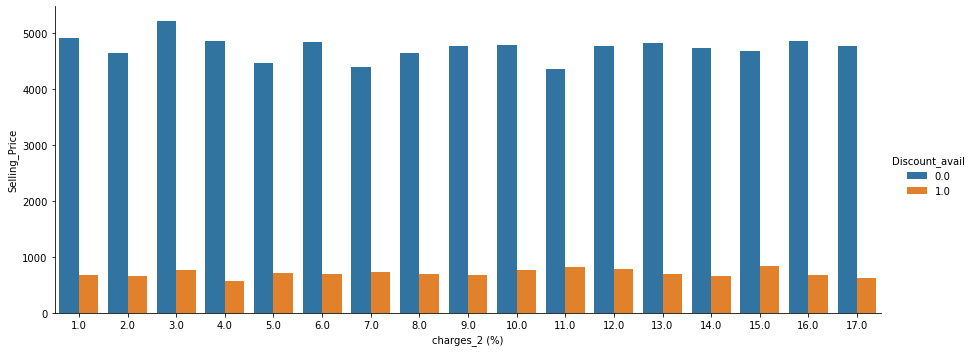

In [29]:
## We need to check the median selling price for products which are available for discount and also considering charges_2 

df = pd.DataFrame(train_data.groupby(["Discount_avail","charges_2 (%)"]).median()["Selling_Price"],columns = ["Selling_Price"]).reset_index()
sns.factorplot(x = "charges_2 (%)", y = "Selling_Price", data = df, hue = "Discount_avail", kind = "bar" ,aspect=20/8)

> Discountable prooducts are of same cost for all types of charges_2.

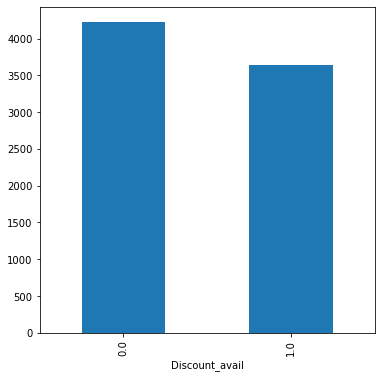

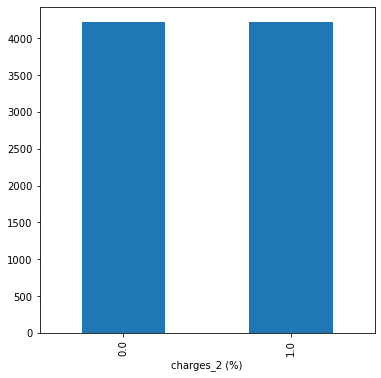

In [30]:
## Checking missing values impact on selling price
for var in ["Discount_avail","charges_2 (%)"]:
    fig = plt.figure(figsize = (6,6))
    train_data_dummy[var] = pd.DataFrame(np.where(train_data_dummy[var].isna(),1,0))
    train_data_dummy.groupby(var).median()['Selling_Price'].plot(kind = "bar")   
    plt.show()

- So we can see that median selling price is more or less same as the median selling price for non-missing values.

In [31]:
df = train_data[train_data['charges_2 (%)'].isna()]
df = pd.DataFrame(df.groupby(["Discount_avail"]).size(),columns = ["count"])
df

,count
Discount_avail,
0.0,184
1.0,19


In [32]:
train_data.groupby(["Discount_avail"]).median()["charges_2 (%)"]

Discount_avail
0.0    10.0
1.0    10.0
Name: charges_2 (%), dtype: float64

In [33]:
train_data.groupby(["Discount_avail","Loyalty_customer"]).median()["charges_2 (%)"]

Discount_avail  Loyalty_customer
0.0             No                  10.0
                Yes                 10.0
1.0             No                  11.0
                Yes                 10.0
Name: charges_2 (%), dtype: float64

In [34]:
train_data.groupby(["Discount_avail","Product_Category"]).median()["charges_2 (%)"] 

Discount_avail  Product_Category
0.0             Child_care          11.0
                Cosmetics           15.0
                Educational         11.0
                Fashion             14.0
                Home_decor          13.0
                Hospitality          9.0
                Organic              7.0
                Pet_care             6.0
                Repair               5.0
                Technology          11.0
1.0             Child_care          10.0
                Cosmetics           15.0
                Educational         10.0
                Fashion             14.0
                Home_decor          14.0
                Hospitality          9.0
                Organic              7.0
                Pet_care             6.0
                Repair               5.0
                Technology          11.0
Name: charges_2 (%), dtype: float64

In [35]:
train_data.groupby(["Discount_avail","Grade"]).median()["charges_2 (%)"] 

Discount_avail  Grade
0.0             0        10.0
                1        10.0
                2        10.0
                3         9.0
1.0             0        11.0
                1        10.0
                2        10.0
                3        11.0
Name: charges_2 (%), dtype: float64

## Continuous variables

In [36]:
continuous_variables = [var for var in numeric_variables if var not in discrete_variables]
continuous_variables

['Market_Category',
 'Demand',
 'charges_1',
 'Minimum_price',
 'Maximum_price',
 'Selling_Price']

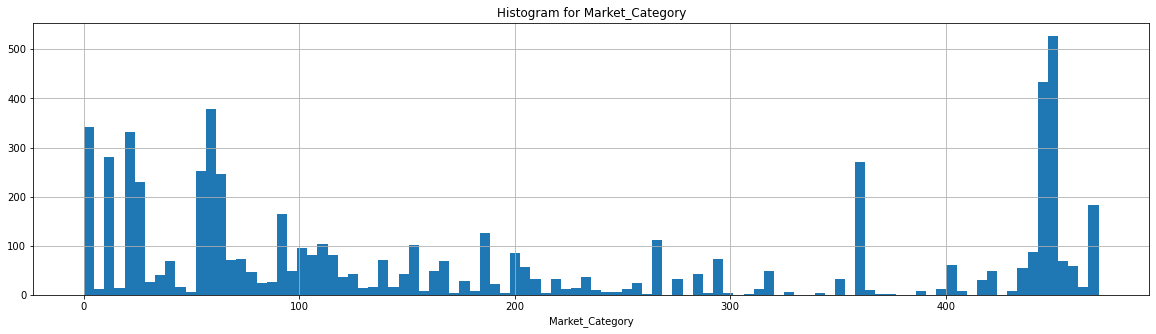

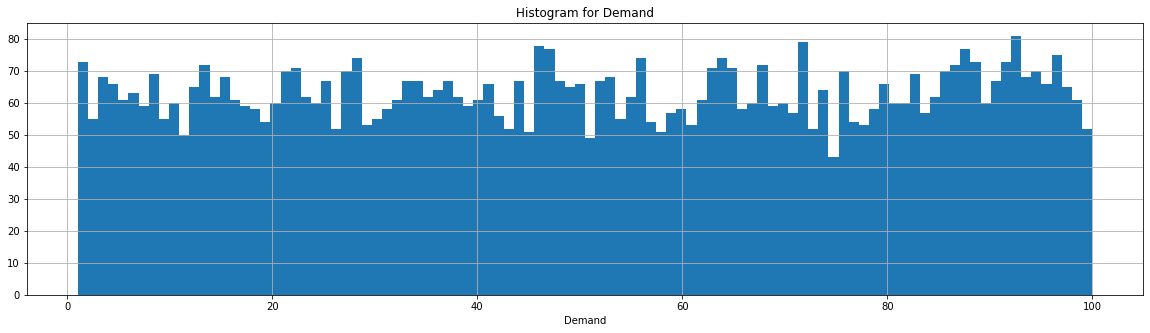

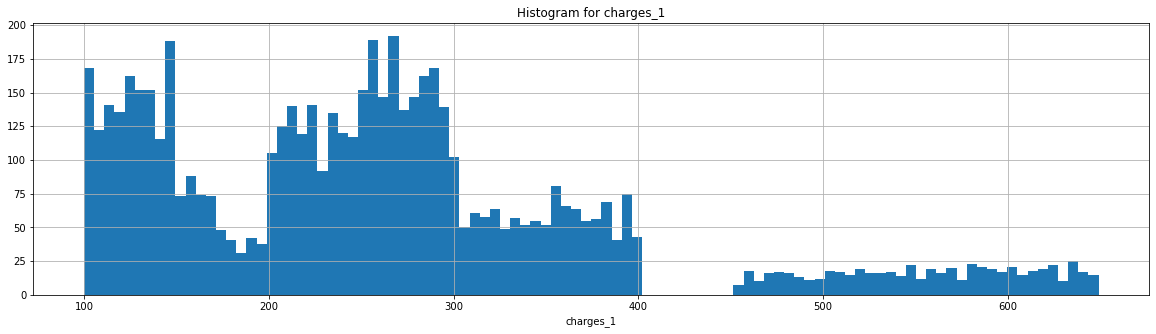

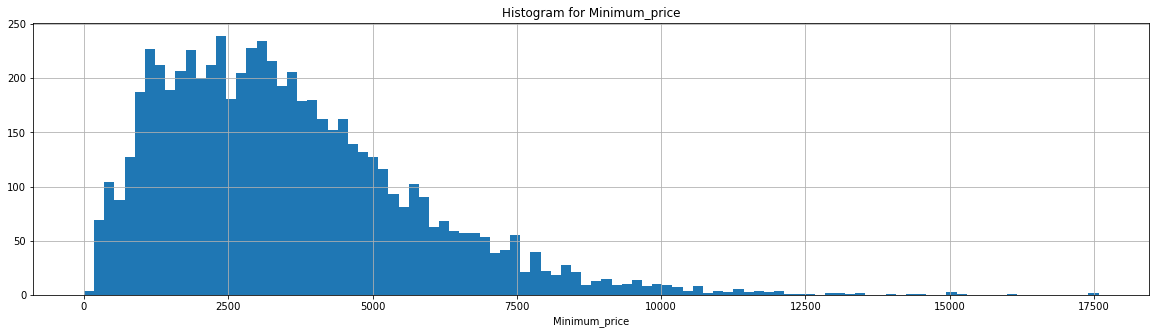

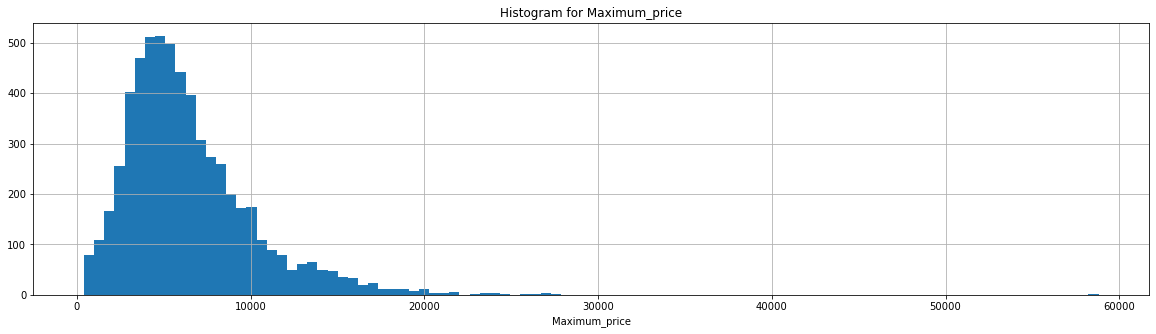

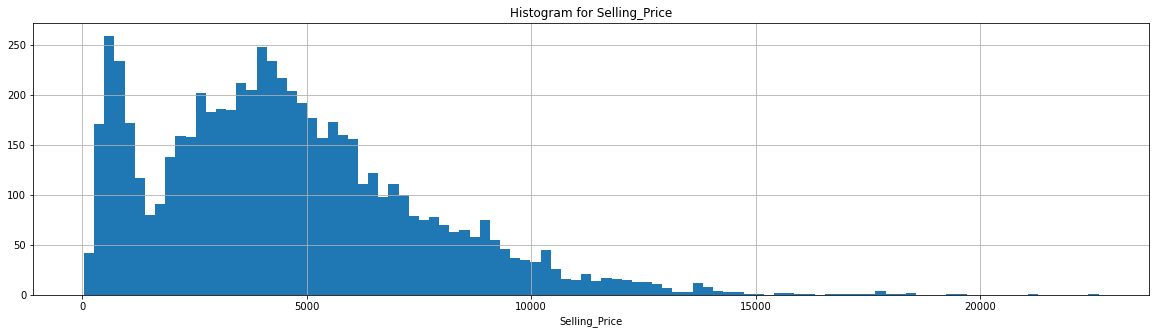

In [37]:
# Frequency distribution for these continuous variables
for var in continuous_variables:
    fig = plt.figure(figsize= (20,5))
    train_data[var].hist(bins= 100)
    plt.xlabel(var)
    plt.title(f"Histogram for {var}")
    plt.show()

- products are sold less when charges_1 is greater than 400.
- For some market category more number of products are sold.
- Every product has quite same demand.
- charges_1,minimum,maximum and sales_Price is quite positively symmetric.

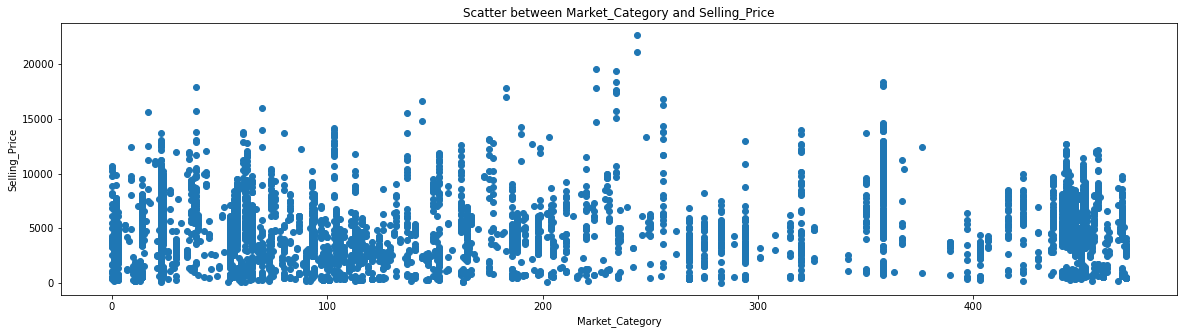

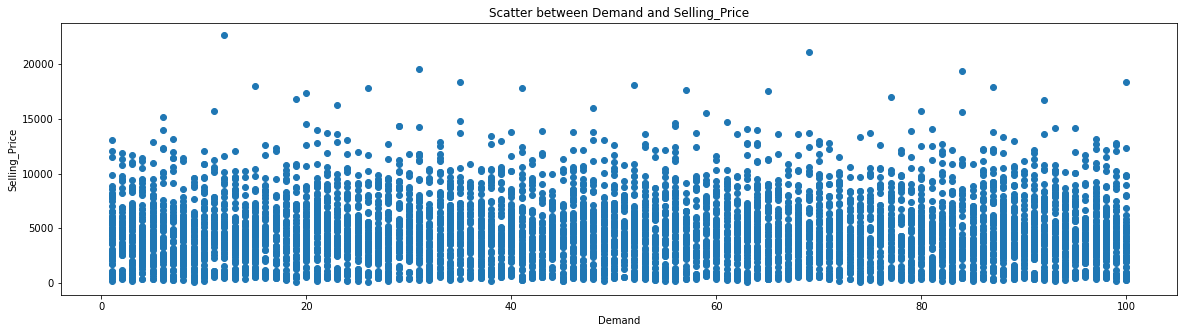

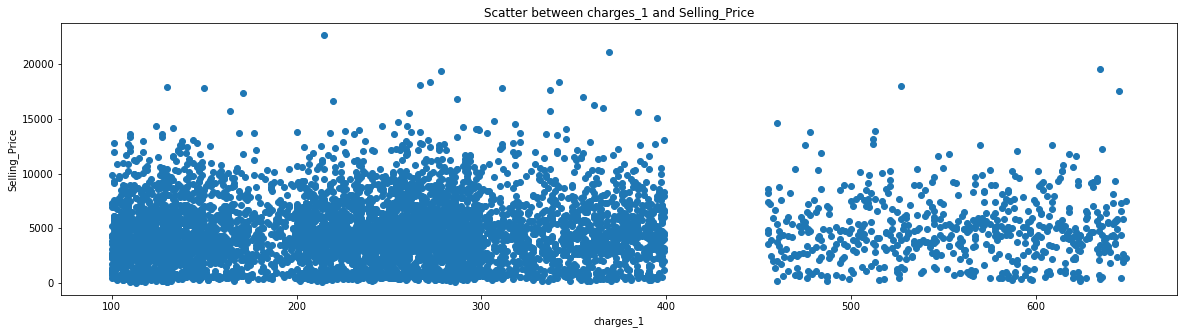

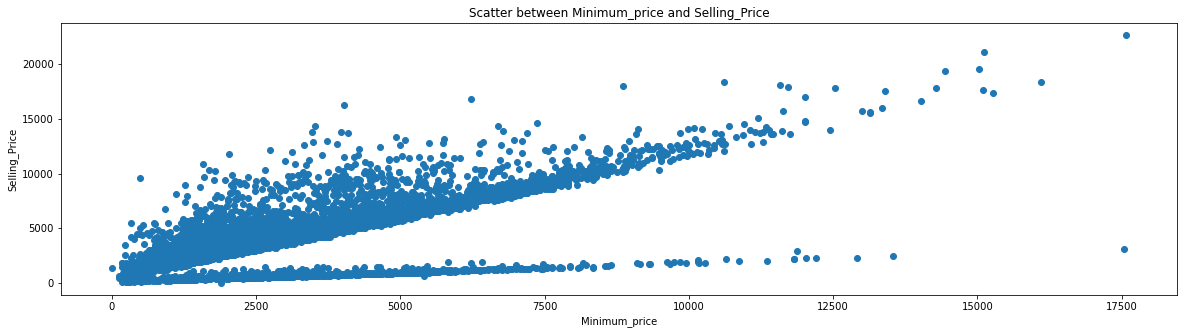

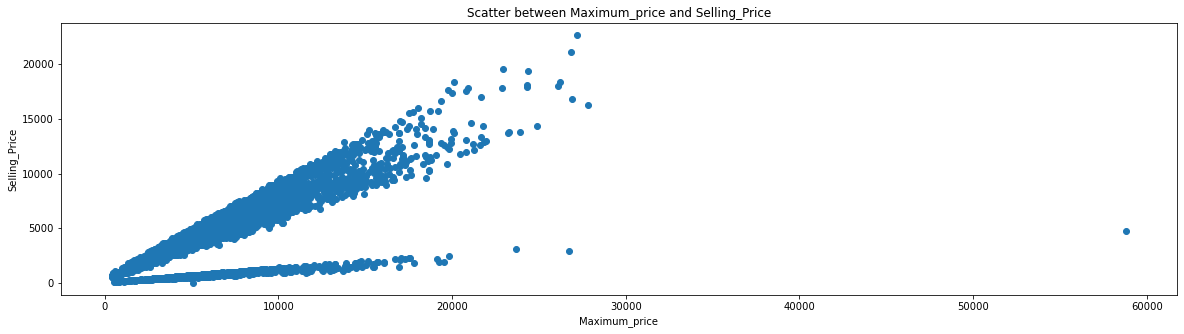

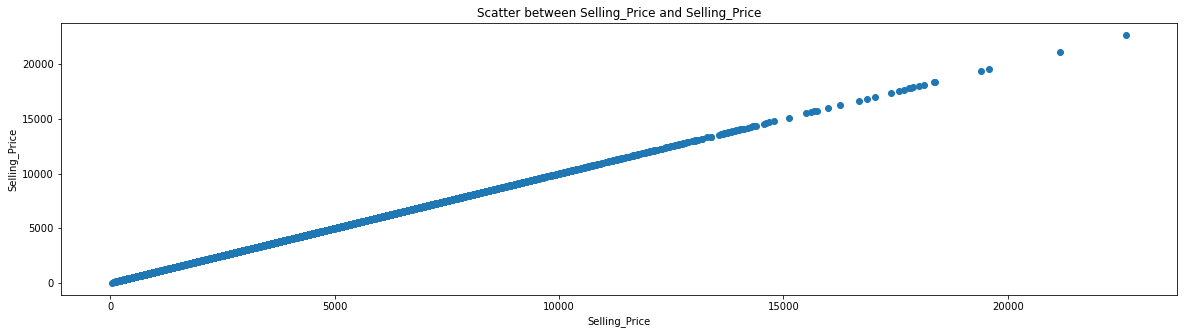

In [38]:
# Frequency distribution for these continuous variables
for var in continuous_variables:
    fig = plt.figure(figsize= (20,5))
    plt.scatter(x = train_data[var], y= train_data["Selling_Price"])
    plt.xlabel(var)
    plt.ylabel("Selling_Price")
    plt.title(f"Scatter between {var} and Selling_Price")
    plt.show()

- One thing is the products sold from less frequent market categories have selling price high. So people sold them less.
- Products having charge_1 > 400 having selling price similar to charges_1 < 400 but as charges are high so it is obvious people will buy it less.
- There are some cases where minimum price is greater than actual selling price which is bad data also some cases where maximum price is less than selling price that means again bad data.
- For maxumum and minium price clearly we can see some outliers.
- They are linearly related to target.

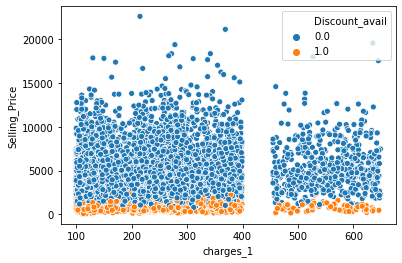

In [39]:
## Charges_1 and Selling_Price by discount
sns.scatterplot(x = "charges_1", y = "Selling_Price", data = train_data, hue = "Discount_avail")

In [40]:
bad_data_for_min_price = train_data[train_data["Minimum_price"] >= train_data["Selling_Price"]]
bad_data_for_min_price

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
9,BRAE3P8Y8UVRY43K,5.0,2015-08-19 22:16:52.000,275,Nigel,Yes,Child_care,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862
20,ACCDX9Y3MJET7BHY,24.0,2016-03-27 19:15:57.000,137,Freja,Yes,Organic,0,7,1.0,139.0,7.0,5821.0,19237.0,1901.325348
38,TUNEBYH39YV2GFFT,25.0,2016-03-28 22:41:35.000,11,Madhav,Yes,Pet_care,3,85,1.0,166.0,7.0,558.0,1469.0,174.482246
39,SHIEBZY34GZUFZQX,21.0,2015-08-15 22:15:41.000,443,Rivka,Yes,Technology,0,40,1.0,613.0,13.0,5658.0,8363.0,1119.131441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,NKCDTAXFESVCMRZK,7.0,2016-01-03 06:06:05.000,58,Cydney,No,Educational,0,91,1.0,132.0,15.0,4810.0,6082.0,825.859373
6341,NKCEBVGGUEZCJZZR,1.0,2016-01-07 07:06:06.000,121,Chizaram,No,Hospitality,0,23,1.0,222.0,13.0,1112.0,3669.0,391.360646
6347,ACCEGKXQ2AQQ2AQV,18.0,2016-02-26 06:54:29.000,452,Quetzalli,No,Repair,0,46,1.0,205.0,8.0,4345.0,6564.0,844.141694
6358,CAGDUGFYPRZUAJCM,40.0,2016-02-07 03:07:41.000,471,Carlin,No,Educational,2,10,1.0,165.0,8.0,2454.0,3480.0,470.108484


We can see 876 observations where minimum price is greater than selling price which is absurd. There might be some reason behind it.

In [41]:
bad_data_for_max_price = train_data[train_data["Maximum_price"] <= train_data["Selling_Price"]]
bad_data_for_max_price

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
71,BNGEB467ZXZZ4HWS,24.0,2015-09-26 15:22:19.000,58,Luci,Yes,Technology,1,39,0.0,646.0,10.0,3251.0,4273.0,4400.730600
88,BRAEDTP5YKZBKWKH,5.0,2015-08-20 18:36:10.000,110,Maribel,Yes,Repair,0,77,0.0,258.0,4.0,710.0,999.0,1101.711600
117,TSHEBSFAYNFJY6ZY,2.0,2016-03-30 21:02:09.000,255,Edwardo,No,Home_decor,2,32,0.0,280.0,10.0,124.0,604.0,642.749100
209,SHOEFECFE5BHMYZA,45.0,2016-03-04 22:46:08.000,216,Ameenah,No,Repair,0,6,0.0,289.0,1.0,261.0,488.0,663.473646
255,CRTECN2QXHYSFTHY,16.0,2015-09-26 15:31:58.000,80,Lynnlee,Yes,Cosmetics,2,31,0.0,287.0,14.0,366.0,568.0,752.763375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,NKCDWHFRFMBFZCTY,37.0,2015-09-26 15:23:16.000,11,Melannie,No,Cosmetics,3,12,0.0,NaN,17.0,482.0,758.0,882.961695
6201,CAGEA3JMBZUV5DQV,49.0,2016-01-17 12:03:36.000,101,Nisa,No,Technology,0,9,0.0,647.0,5.0,1169.0,1867.0,2165.543424
6229,SHIE5U6NBCUHQZTS,11.0,2015-09-23 14:25:12.000,115,Rylin,Yes,Technology,0,46,0.0,559.0,8.0,1278.0,1986.0,2178.279216
6328,NKCDYQ3RMTJXVBDV,16.0,2015-09-24 17:29:15.000,58,Evalina,Yes,Technology,1,39,0.0,643.0,11.0,2961.0,4176.0,4204.891425


We can see 168 observations where maximum price is less than selling price which is absurd. There might be some reason behind it.

In [42]:
# No. of cases where selling price is not in max-min interval
bad_data_for_selling_price_notin_interval = train_data[~((train_data["Selling_Price"] <= train_data["Maximum_price"]) & (train_data["Selling_Price"] >= train_data["Minimum_price"]))]
bad_data_for_selling_price_notin_interval

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
9,BRAE3P8Y8UVRY43K,5.0,2015-08-19 22:16:52.000,275,Nigel,Yes,Child_care,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,NaN,11.0,786.0,NaN,2582.860500
20,ACCDX9Y3MJET7BHY,24.0,2016-03-27 19:15:57.000,137,Freja,Yes,Organic,0,7,1.0,139.0,7.0,5821.0,19237.0,1901.325348
36,NKCE5T3GVHYKZSDH,5.0,2015-11-19 03:54:47.000,14,Karisma,Yes,Child_care,0,61,0.0,323.0,14.0,5682.0,NaN,7056.729900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,ACCEGKXQ2AQQ2AQV,18.0,2016-02-26 06:54:29.000,452,Quetzalli,No,Repair,0,46,1.0,205.0,8.0,4345.0,6564.0,844.141694
6355,BRAEBUHTTCZKDPTC,20.0,2015-08-20 02:32:24.000,65,Pamela,No,Technology,0,81,0.0,564.0,16.0,3669.0,NaN,5165.500032
6356,TOPDYAZZNRQMQABE,48.0,2015-08-23 18:48:47.000,68,Kiran,No,Technology,2,13,0.0,640.0,12.0,910.0,NaN,2846.355336
6358,CAGDUGFYPRZUAJCM,40.0,2016-02-07 03:07:41.000,471,Carlin,No,Educational,2,10,1.0,165.0,8.0,2454.0,3480.0,470.108484


We can see 1382 observations where selling_price is not in interval (minimum_price , maximum_price) which is absurd. There might be some reason behind it.

In [43]:
# No. of cases where selling price is not in max-min interval
bad_data_for_selling_price_notin_interval_without_na = train_data[~((train_data["Selling_Price"] <= train_data["Maximum_price"]) & (train_data["Selling_Price"] >= train_data["Minimum_price"])) & (~(train_data["Minimum_price"].isna())) & (~(train_data["Maximum_price"].isna()))]
bad_data_for_selling_price_notin_interval_without_na

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
9,BRAE3P8Y8UVRY43K,5.0,2015-08-19 22:16:52.000,275,Nigel,Yes,Child_care,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862
20,ACCDX9Y3MJET7BHY,24.0,2016-03-27 19:15:57.000,137,Freja,Yes,Organic,0,7,1.0,139.0,7.0,5821.0,19237.0,1901.325348
38,TUNEBYH39YV2GFFT,25.0,2016-03-28 22:41:35.000,11,Madhav,Yes,Pet_care,3,85,1.0,166.0,7.0,558.0,1469.0,174.482246
39,SHIEBZY34GZUFZQX,21.0,2015-08-15 22:15:41.000,443,Rivka,Yes,Technology,0,40,1.0,613.0,13.0,5658.0,8363.0,1119.131441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,NKCEBVGGUEZCJZZR,1.0,2016-01-07 07:06:06.000,121,Chizaram,No,Hospitality,0,23,1.0,222.0,13.0,1112.0,3669.0,391.360646
6342,NKCE6WKBNBGFYKPW,25.0,2015-11-21 04:55:04.000,90,Oshea,Yes,Repair,0,71,0.0,216.0,3.0,683.0,1023.0,1058.567400
6347,ACCEGKXQ2AQQ2AQV,18.0,2016-02-26 06:54:29.000,452,Quetzalli,No,Repair,0,46,1.0,205.0,8.0,4345.0,6564.0,844.141694
6358,CAGDUGFYPRZUAJCM,40.0,2016-02-07 03:07:41.000,471,Carlin,No,Educational,2,10,1.0,165.0,8.0,2454.0,3480.0,470.108484


In [44]:
## Exploring the reason for bad data for selling price not in interval
bad_data_for_selling_price_notin_interval_without_na.groupby('Discount_avail').count()[['Minimum_price','Maximum_price','Selling_Price']]

,Minimum_price,Maximum_price,Selling_Price
Discount_avail,,,
0.0,167,167,167
1.0,834,834,834


In [45]:
bad_data_for_selling_price_notin_interval_without_na.groupby(["Discount_avail"]).median()[['Minimum_price','Maximum_price']]

,Minimum_price,Maximum_price
Discount_avail,,
0.0,1069.0,1545.0
1.0,3258.0,5799.0


In [46]:
train_data["Discount_avail"].value_counts()

0.0    5396
1.0     880
Name: Discount_avail, dtype: int64

- Here one observation we can see here is that those products for which discount is available is 834 which is most of the total no. of discounted products in whole data(880). It means where we have discount available most of the times we can see a bad data.

In [47]:
train_data.groupby(["Discount_avail"]).median()[['Minimum_price','Maximum_price']]

,Minimum_price,Maximum_price
Discount_avail,,
0.0,3166.0,5626.0
1.0,3195.5,5802.5


In [48]:
bad_data_for_selling_price_notin_interval_without_na.groupby('Discount_avail').median()[['Minimum_price','Maximum_price','Selling_Price']]

,Minimum_price,Maximum_price,Selling_Price
Discount_avail,,,
0.0,1069.0,1545.0,1703.689614
1.0,3258.0,5799.0,716.675677


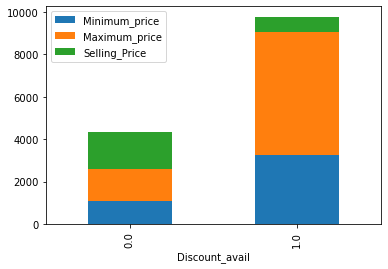

In [49]:
bad_data_for_selling_price_notin_interval_without_na.groupby('Discount_avail').median()[['Minimum_price','Maximum_price','Selling_Price']].plot(kind = "bar",stacked = True)

C:\Users\Chayan\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


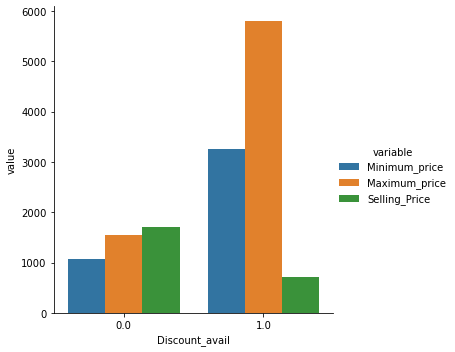

In [50]:
df = bad_data_for_selling_price_notin_interval_without_na.groupby('Discount_avail').median()[['Minimum_price','Maximum_price','Selling_Price']].reset_index()
df = pd.melt(df,id_vars = ['Discount_avail'], value_vars = ['Minimum_price','Maximum_price','Selling_Price'])
sns.factorplot(x = "Discount_avail", y ="value" , data = df, hue = 'variable', kind = "bar")

From the above plot we can notice that -
- Median selling price is always greater than maximum and minimum price where discount is given,
- Median selling price is always less than maximum and minimum price where discount is not given.

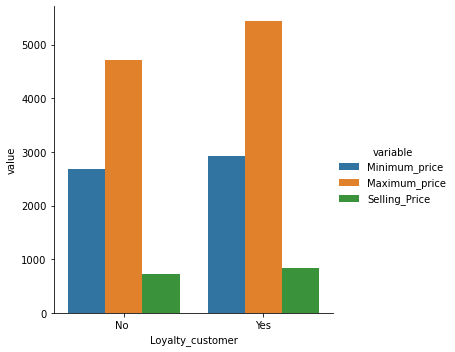

In [51]:
df = bad_data_for_selling_price_notin_interval_without_na.groupby('Loyalty_customer').median()[['Minimum_price','Maximum_price','Selling_Price']].reset_index()
df = pd.melt(df,id_vars = ['Loyalty_customer'], value_vars = ['Minimum_price','Maximum_price','Selling_Price'])
sns.factorplot(x = "Loyalty_customer", y ="value" , data = df, hue = 'variable', kind = "bar")

No such info from loyalty customers.

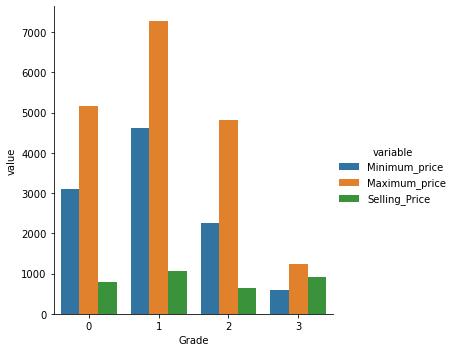

In [52]:
df = bad_data_for_selling_price_notin_interval_without_na.groupby('Grade').median()[['Minimum_price','Maximum_price','Selling_Price']].reset_index()
df = pd.melt(df,id_vars = ['Grade'], value_vars = ['Minimum_price','Maximum_price','Selling_Price'])
sns.factorplot(x = "Grade", y ="value" , data = df, hue = 'variable', kind = "bar")

No such info from grade of products..

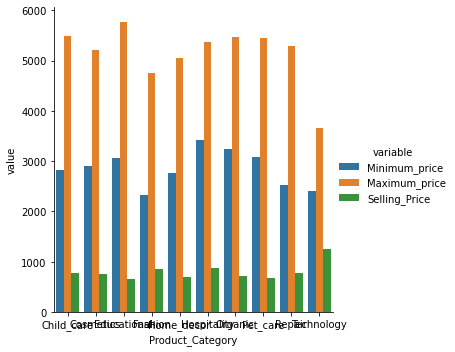

In [53]:
df = bad_data_for_selling_price_notin_interval_without_na.groupby('Product_Category').median()[['Minimum_price','Maximum_price','Selling_Price']].reset_index()
df = pd.melt(df,id_vars = ['Product_Category'], value_vars = ['Minimum_price','Maximum_price','Selling_Price'])
sns.factorplot(x = "Product_Category", y ="value" , data = df, hue = 'variable', kind = "bar")

In [54]:
## Trying to find the importance of instock column
train_data_dummy = train_data.copy()
train_data_dummy['date'] = train_data_dummy['instock_date'].apply(lambda x: x[:10])
train_data_dummy['year'] = train_data_dummy['instock_date'].apply(lambda x: x[:4])
train_data_dummy['year_month'] = train_data_dummy['instock_date'].apply(lambda x: x[:7])
train_data_dummy['hour'] = train_data_dummy['instock_date'].apply(lambda x: x[10:13])
train_data_dummy.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,date,year,year_month,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015-08-22,2015,2015-08,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016-03-27,2016,2016-03,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015-08-18,2015,2015-08,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016-03-28,2016,2016-03,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016-03-29,2016,2016-03,22


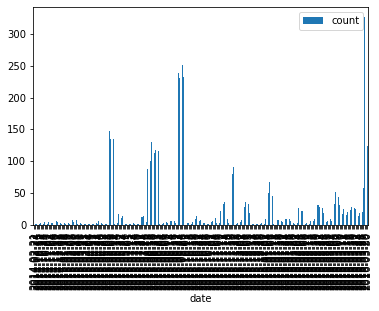

In [55]:
pd.DataFrame(train_data_dummy.groupby('date').size(),columns= ['count']).plot(kind = 'bar')

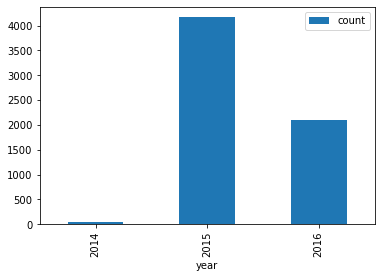

In [56]:
pd.DataFrame(train_data_dummy.groupby('year').size(),columns= ['count']).plot(kind = 'bar')

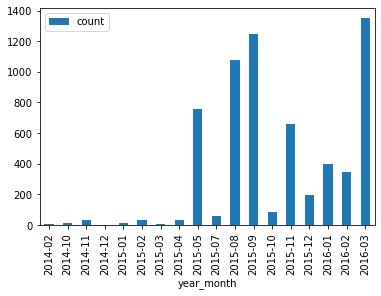

In [57]:
pd.DataFrame(train_data_dummy.groupby('year_month').size(),columns= ['count']).plot(kind = "bar")

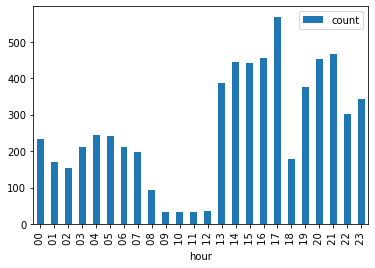

In [58]:
pd.DataFrame(train_data_dummy.groupby('hour').size(),columns= ['count']).plot(kind = "bar")

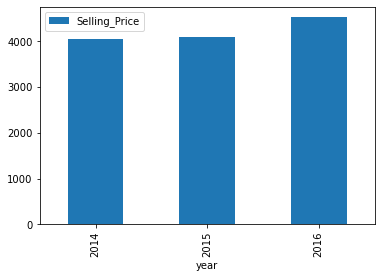

In [59]:
pd.DataFrame(train_data_dummy.groupby('year').median()['Selling_Price']).plot(kind = 'bar')

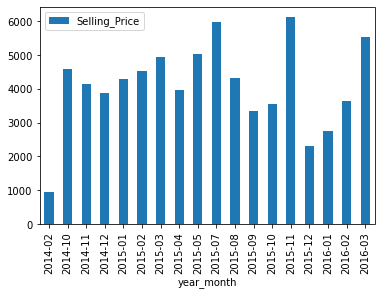

In [60]:
pd.DataFrame(train_data_dummy.groupby('year_month').median()['Selling_Price']).plot(kind = 'bar')

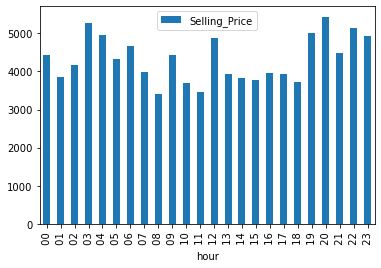

In [61]:
pd.DataFrame(train_data_dummy.groupby('hour').median()['Selling_Price']).plot(kind = 'bar')

In [62]:
# Reason behind missing values 
train_data_dummy = train_data.copy()
train_data_dummy["missing_discount"] = np.where(train_data_dummy['Discount_avail'].isna(),1,0)
train_data_dummy["missing_charge_1"] = np.where(train_data_dummy['charges_1'].isna(),1,0)
train_data_dummy["missing_charge_2"] = np.where(train_data_dummy['charges_2 (%)'].isna(),1,0)
train_data_dummy["missing_min_price"] = np.where(train_data_dummy['Minimum_price'].isna(),1,0)
train_data_dummy["missing_max_price"] = np.where(train_data_dummy['Maximum_price'].isna(),1,0)
train_data_dummy.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,missing_discount,missing_charge_1,missing_charge_2,missing_min_price,missing_max_price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,0,0,0,0,0
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,0,0,0,0,0
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,0,0,0,0,0
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,0,0,0,0,0
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,0,0,0,0,0


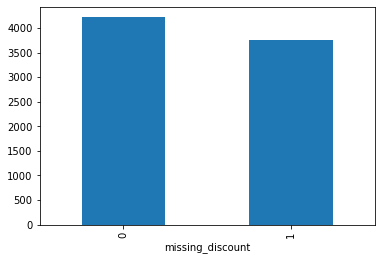

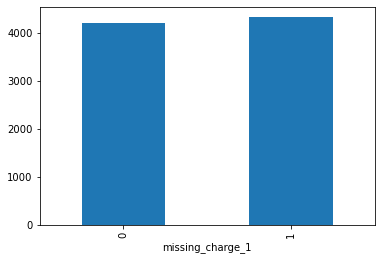

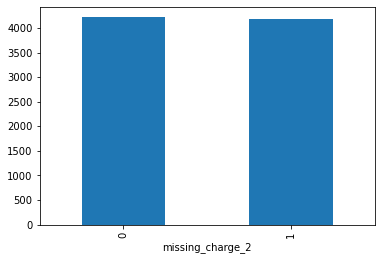

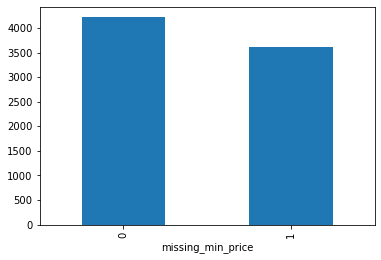

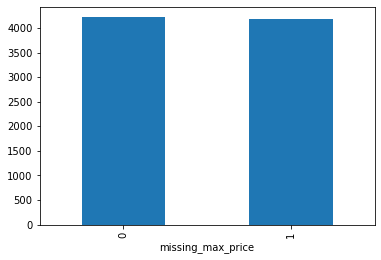

In [63]:
for var in ['missing_discount','missing_charge_1','missing_charge_2','missing_min_price','missing_max_price']:
    train_data_dummy.groupby(var).median()['Selling_Price'].plot(kind = 'bar')
    plt.show()

We can that median value for missing data is quite high for each case.

In [64]:
train_data_dummy.groupby(['Grade','missing_discount']).size()

Grade  missing_discount
0      0                   4314
       1                     25
1      0                    378
       1                      1
2      0                   1084
       1                      9
3      0                    500
       1                      2
dtype: int64

In [65]:
## Discount wise count of charge_2

train_data_dummy[train_data_dummy['missing_charge_2'] == 1].fillna("missing").groupby(['Discount_avail']).size()

Discount_avail
0.0        184
1.0         19
missing      1
dtype: int64

In [66]:
train_data_dummy.fillna("missing").groupby(['Discount_avail']).median()

,Market_Category,Grade,Demand,Selling_Price,missing_discount,missing_charge_1,missing_charge_2,missing_min_price,missing_max_price
Discount_avail,,,,,,,,,
0.0,131.0,0.0,51.0,4684.352040,0,0,0,0,0
1.0,124.0,0.0,51.5,711.973798,0,0,0,0,0
missing,198.0,0.0,35.0,3763.554300,1,0,0,0,0


In [67]:
train_data_dummy.groupby(['Grade','missing_discount']).size()

Grade  missing_discount
0      0                   4314
       1                     25
1      0                    378
       1                      1
2      0                   1084
       1                      9
3      0                    500
       1                      2
dtype: int64

In [68]:
train_data_dummy = train_data.copy()
print(train_data_dummy[train_data_dummy['charges_1'].isna()].shape)
print("\n")
print(train_data_dummy[train_data_dummy['charges_1'].isna()].groupby('Discount_avail').size())
print("\n")
print(train_data_dummy[train_data_dummy['charges_1'].isna()].groupby('Grade').size())
print("\n")
print(train_data_dummy[train_data_dummy['charges_1'].isna()].groupby('Loyalty_customer').size())
print("\n")
print(train_data_dummy[train_data_dummy['charges_1'].isna()].groupby('Product_Category').size())

(197, 15)


Discount_avail
0.0    184
1.0     11
dtype: int64


Grade
0    135
1     16
2     28
3     18
dtype: int64


Loyalty_customer
No      79
Yes    118
dtype: int64


Product_Category
Child_care     18
Cosmetics      14
Educational    17
Fashion        25
Home_decor     28
Hospitality    22
Organic        13
Pet_care       15
Repair         23
Technology     22
dtype: int64


Here we can see that charges_1 is missing for discount_avail = no in a large number. So we can replace the missing values in charges_1 by median value of the observations for which discount_avail = 0

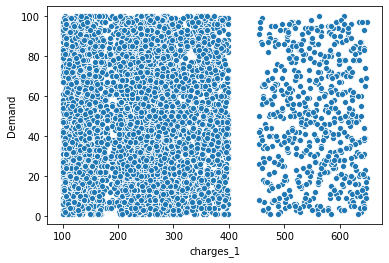

In [69]:
# We want to see if there is any relationship between charges_1 and demand variable
sns.scatterplot(x = 'charges_1', y = 'Demand', data = train_data_dummy)

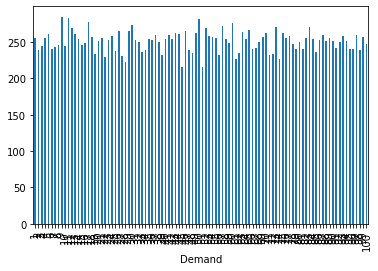

In [70]:
train_data_dummy.groupby('Demand').median()['charges_1'].plot(kind = 'bar')

Here as we can see that charges_1 is quite uniformly distributed with demand as well as selling_price and there is a drastic gap after charges_1 = 400 so we can divide the variable with thresold = 400.

In [71]:
import math
train_data_dummy['charges_1_new'] = train_data_dummy['charges_1'].apply(lambda x: np.nan if math.isnan(x) else 1 if x > 400 else 0)
train_data_dummy[train_data_dummy['charges_1'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,charges_1_new
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,NaN,11.0,786.0,NaN,2582.860500,NaN
33,BRAE8TFHWYCTDUM3,17.0,2015-08-19 21:08:45.000,101,Roslyn,No,Repair,0,19,0.0,NaN,9.0,950.0,1580.0,1563.983586,NaN
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Linda,Yes,Cosmetics,3,31,0.0,NaN,NaN,9483.0,13644.0,11761.213275,NaN
106,MUGEACY8DDVJ8QAD,30.0,2015-09-22 17:22:59.000,451,Maximillian,Yes,Fashion,0,53,0.0,NaN,17.0,4627.0,NaN,5512.304016,NaN
182,PBXEAREZRNRE8BBY,39.0,2015-11-20 05:56:33.000,70,Jacion,No,Fashion,2,98,0.0,NaN,16.0,3225.0,5287.0,4592.708736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,KTAEHE9KNNU7RP4Z,12.0,2014-11-04 13:30:23.000,13,Levi,Yes,Hospitality,3,44,0.0,NaN,10.0,341.0,2196.0,1473.280272,NaN
6216,PBXE5SJHVBDY7PHS,5.0,2015-11-17 18:29:51.000,451,Liesl,No,Technology,0,85,0.0,NaN,10.0,5647.0,7671.0,7021.079296,NaN
6243,SHIE3QDH6Z4KU5TY,6.0,2015-08-23 19:36:12.000,146,NaN,No,Hospitality,2,4,0.0,NaN,13.0,1669.0,2557.0,2356.514325,NaN
6246,PACEBEW6FSE32PDY,31.0,2015-09-24 15:24:14.000,91,Mayla,No,Cosmetics,0,9,0.0,NaN,17.0,1782.0,4000.0,3147.595209,NaN


In [72]:
train_data_dummy['charges_1_new'].value_counts()

0.0    5522
1.0     594
Name: charges_1_new, dtype: int64

In [73]:
train_data_dummy[train_data_dummy['charges_1_new'].isna()].groupby('Discount_avail').size()

Discount_avail
0.0    184
1.0     11
dtype: int64

So we can try impute 0 for all missing values in charges_1 or we can impute by median value of charges_1 under 400 in charges_1 column.

In [74]:
## Charges_2 % var wrt discount
train_data_dummy.groupby(["Discount_avail"]).median()["charges_2 (%)"]

Discount_avail
0.0    10.0
1.0    10.0
Name: charges_2 (%), dtype: float64

In [75]:
bad_data_for_selling_price_notin_interval_without_na.groupby(["Discount_avail"]).median()[['Minimum_price','Maximum_price']]

,Minimum_price,Maximum_price
Discount_avail,,
0.0,1069.0,1545.0
1.0,3258.0,5799.0


It is better to build two models for discount avilable = 1 and onother is for discount available = 0.

# Data Preprocessing

In [76]:
from sklearn.model_selection import train_test_split
data = train_data[train_data['Stall_no'].notna()]
print(data.shape)
X = data.iloc[:,:-1]
y = data['Selling_Price']

(6308, 15)


In [77]:
X.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0


In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [562]:
# Now check missing values
X_train.isna().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       131
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       23
charges_1           131
charges_2 (%)       144
Minimum_price        21
Maximum_price       236
dtype: int64

In [563]:
# Now check missing values
X_test.isna().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name        75
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       14
charges_1            66
charges_2 (%)        60
Minimum_price        17
Maximum_price       103
dtype: int64

In [564]:
X_train.shape

(4226, 14)

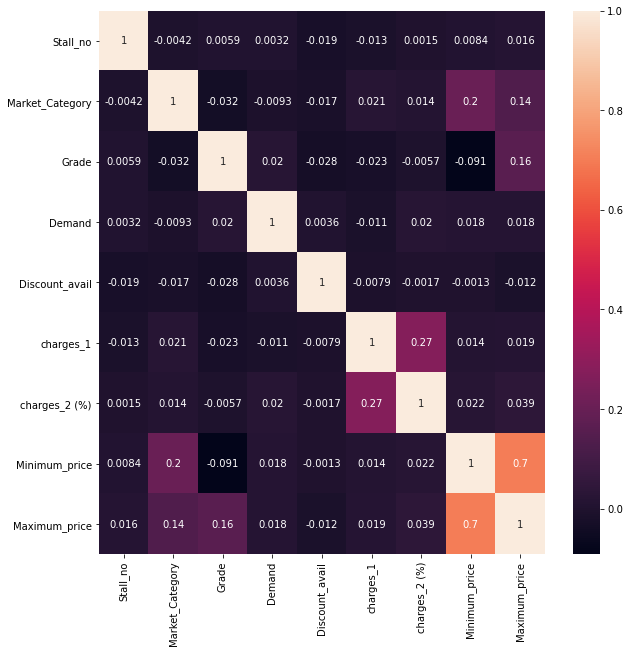

In [565]:
cor = X_train.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(cor,annot= True)

In [566]:
# from scipy.stats import spearmanr
# # now we craete one matrix of spearman's correlations
# train_data_dummy = train_data.copy()
# train_data_dummy['Loyalty_customer'] = train_data['Loyalty_customer'].map({'Yes' : 1, "No" : 0})
# vars = ['Stall_no','Market_Category','Loyalty_customer','Grade','Discount_avail','charges_2 (%)']

# rows = []
# for var1 in vars:
#     cols = []
#     for var2 in vars:
#         spe_rho,p_value = spearmanr(train_data_dummy[var1],train_data_dummy[var2])
#         cols.append(spe_rho)
#     rows.append(cols)
    
# spearman_association_table = pd.DataFrame(np.array(rows), columns= vars, index= vars)
# spearman_association_table

In [567]:
# from scipy.stats import kendalltau
# # now we craete one matrix of spearman's correlations
# train_data_dummy = train_data.copy()
# train_data_dummy['Loyalty_customer'] = train_data['Loyalty_customer'].map({'Yes' : 1, "No" : 0})
# vars = ['Stall_no','Market_Category','Loyalty_customer','Grade','Discount_avail','charges_2 (%)']
# print(train_data_dummy.head())
# rows = []
# for var1 in vars:
#     cols = []
#     for var2 in vars:
#         ken_tau,p_value = kendalltau(train_data_dummy[var1],train_data_dummy[var2])
#         cols.append(ken_tau)
#     rows.append(cols)
    
# kendle_association_table = pd.DataFrame(np.array(rows), columns= vars, index= vars)
# kendle_association_table

In [568]:
import warnings
warnings.filterwarnings("ignore")

#### Missing Value Treatment

#### Discount_avail

In [569]:
# X_train['Discount_avail'] = X_train['Discount_avail'].fillna(X_train['Discount_avail'].mode()[0])
# X_test['Discount_avail'] = X_test['Discount_avail'].fillna(X_test['Discount_avail'].mode()[0])
X_train['Discount_avail'] = X_train['Discount_avail'].fillna('missing')
X_test['Discount_avail'] = X_test['Discount_avail'].fillna('missing')

In [570]:
X_train['Discount_avail'].isna().sum()

0

#### charges_2 (%)

In [571]:
X_train.groupby(["Discount_avail"]).median()["charges_2 (%)"]

Discount_avail
0.0        10.0
1.0        10.0
missing    11.0
Name: charges_2 (%), dtype: float64

In [572]:
X_train.groupby(["Grade"]).median()["charges_2 (%)"]

Grade
0    10.5
1    10.0
2    10.0
3    10.0
Name: charges_2 (%), dtype: float64

In [573]:
## Charges mainly differs based on product category
charges_2_dict = X_train.groupby(["Product_Category"]).median()["charges_2 (%)"].to_dict()  # We have taken grade as it has a high correlation with charges_2
charges_2_dict

{'Child_care': 11.0,
 'Cosmetics': 15.0,
 'Educational': 11.0,
 'Fashion': 14.0,
 'Home_decor': 14.0,
 'Hospitality': 10.0,
 'Organic': 7.0,
 'Pet_care': 6.0,
 'Repair': 5.0,
 'Technology': 11.0}

In [574]:
X_train['charges_2_missing'] = np.where(X_train['charges_2 (%)'].isna(),1,0)

In [575]:
# for row in list(X_train[X_train['charges_2 (%)'].isna()].index):
#     for row_dict in range(len(list(charges_2_dict.keys()))):
# #         print(row_dict)
#         if (X_train.loc[row,'Discount_avail'] == list(charges_2_dict.keys())[row_dict][0]) and (X_train.loc[row,'Grade'] == list(charges_2_dict.keys())[row_dict][1]):
#             X_train.loc[row,'charges_2 (%)'] = list(charges_2_dict.values())[row_dict]


for row in list(X_train[X_train['charges_2 (%)'].isna()].index):
    for key in list(charges_2_dict.keys()):
#         print(row_dict)
        if  X_train.loc[row,'Product_Category'] == key:
            X_train.loc[row,'charges_2 (%)'] = charges_2_dict[key]
        

In [576]:
X_train['charges_2 (%)'].isna().sum()

0

In [577]:
charges_2_dict_test = X_test.groupby(["Product_Category"]).median()["charges_2 (%)"].to_dict()
X_test['charges_2_missing'] = np.where(X_test['charges_2 (%)'].isna(),1,0)

# for row in list(X_test[X_test['charges_2 (%)'].isna()].index):
#     for row_dict in range(len(list(charges_2_dict_test.keys()))):
#         if (X_test.loc[row,'Discount_avail'] == list(charges_2_dict_test.keys())[row_dict][0]) and (X_test.loc[row,'Grade'] == list(charges_2_dict_test.keys())[row_dict][1]):
#             X_test.loc[row,'charges_2 (%)'] = list(charges_2_dict_test.values())[row_dict]

for row in list(X_test[X_test['charges_2 (%)'].isna()].index):
    for key in list(charges_2_dict_test.keys()):
#         print(row_dict)
        if  X_test.loc[row,'Product_Category'] == key:
            X_test.loc[row,'charges_2 (%)'] = charges_2_dict_test[key]

In [578]:
X_test['charges_2 (%)'].isna().sum()

0

#### Minimum_price , Maximum_price

In [579]:
X_train.groupby('Discount_avail').median()[['Minimum_price','Maximum_price']]

,Minimum_price,Maximum_price
Discount_avail,,
0.0,3165.0,5603.0
1.0,3131.0,5800.5
missing,2895.0,5040.5


                                Minimum_price         Maximum_price        
                                        count  median         count  median
Discount_avail Loyalty_customer                                            
0.0            No                        1381  3012.0          1309  5236.0
               Yes                       2203  3281.0          2083  5884.0
1.0            No                         248  2906.0           238  5166.5
               Yes                        350  3455.0           338  6163.5
missing        No                           8  1924.5             7  4324.0
               Yes                         15  2999.0            15  5139.0


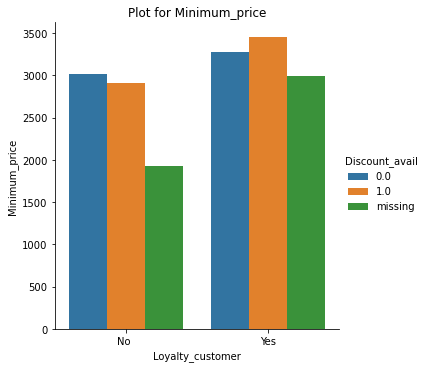

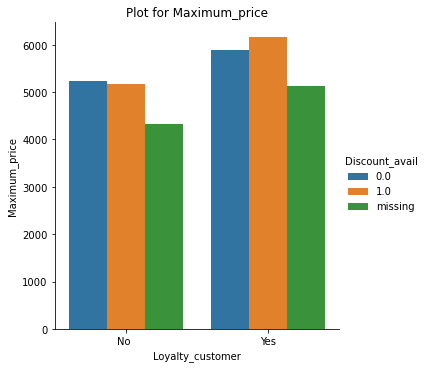

In [580]:
print(X_train.groupby(['Discount_avail','Loyalty_customer']).agg(['count','median'])[['Minimum_price','Maximum_price']])

df = X_train.groupby(['Discount_avail','Loyalty_customer']).median()[['Minimum_price','Maximum_price']].reset_index()

for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Loyalty_customer' , y = var, data = df, hue = 'Discount_avail',kind = 'bar')
    plt.title(f'Plot for {var}')
    plt.show()

                     Minimum_price         Maximum_price        
                             count  median         count  median
Discount_avail Grade                                            
0.0            0              2447  3296.0          2307  5414.0
               1               235  3825.0           220  7142.5
               2               601  2366.0           577  5316.0
               3               301  3179.0           288  9801.5
1.0            0               425  3546.0           408  5759.0
               1                31  4797.0            31  7788.0
               2               113  2225.0           108  5280.0
               3                29  2911.0            29  9830.0
missing        0                16  3340.5            16  5322.5
               2                 6  2209.5             6  4530.0
               3                 1   252.0             0     NaN


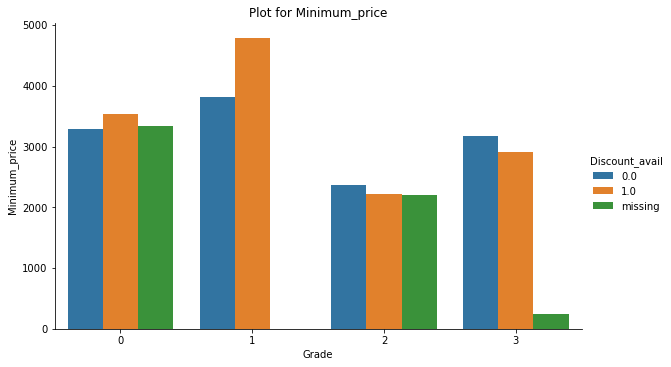

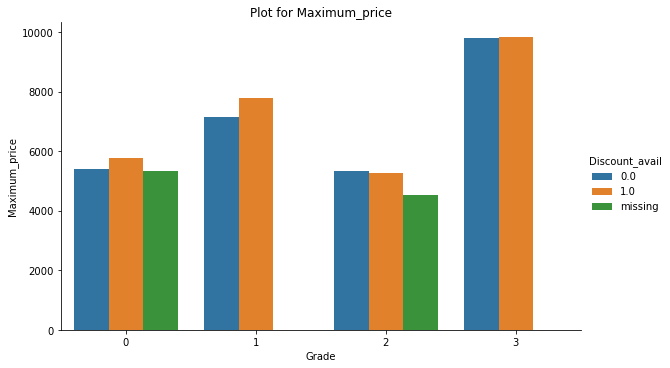

In [581]:
print(X_train.groupby(['Discount_avail','Grade']).agg(['count','median'])[['Minimum_price','Maximum_price']])
df = X_train.groupby(['Discount_avail','Grade']).median()[['Minimum_price','Maximum_price']].reset_index()

for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Grade' , y = var, data = df, hue = 'Discount_avail',kind = 'bar',aspect=10/6)
    plt.title(f'Plot for {var}')
    plt.show()

                       Minimum_price         Maximum_price         
                               count  median         count   median
Grade Product_Category                                             
0     Child_care                 307  3453.0           287   5687.0
      Cosmetics                  287  3460.0           268   5765.0
      Educational                253  3304.0           239   5373.0
      Fashion                    298  3311.0           278   5745.0
      Home_decor                 298  3534.5           284   5459.5
      Hospitality                261  3217.0           252   5317.5
      Organic                    288  3220.5           278   5239.0
      Pet_care                   301  3271.0           288   5450.0
      Repair                     306  3076.5           288   5456.5
      Technology                 289  3553.0           269   5414.0
1     Child_care                  34  3963.5            32   6277.0
      Cosmetics                   25  3235.0    

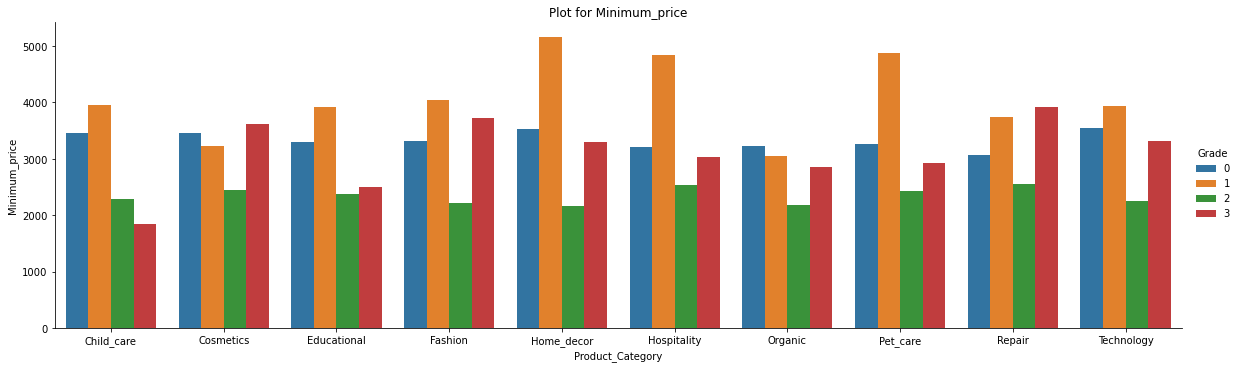

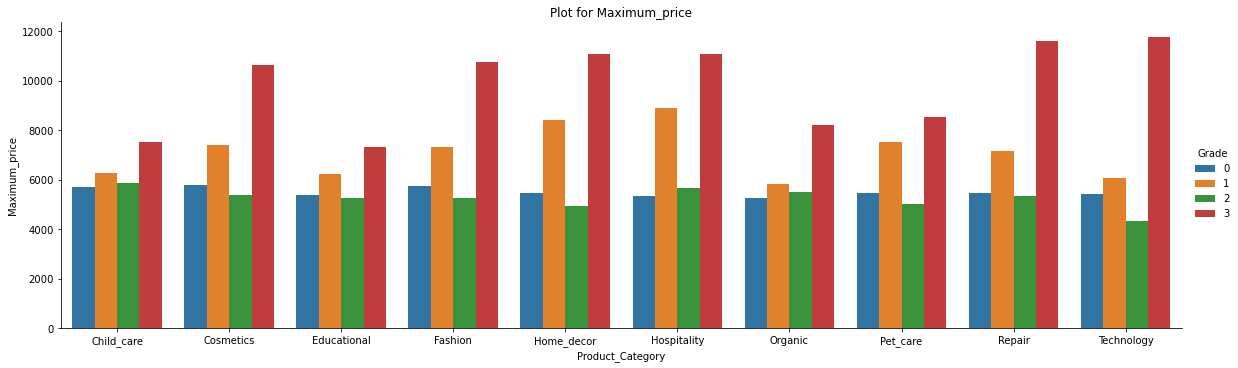

In [582]:
print(X_train.groupby(['Grade','Product_Category']).agg(['count','median'])[['Minimum_price','Maximum_price']])

df = X_train.groupby(['Grade','Product_Category']).median()[['Minimum_price','Maximum_price']].reset_index()

for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Product_Category' , y = var, data = df, hue = 'Grade',kind = 'bar',aspect=20/6)
    plt.title(f'Plot for {var}')
    plt.show()

                                Minimum_price         Maximum_price        
                                        count  median         count  median
Discount_avail Product_Category                                            
0.0            Child_care                 365  3254.0           340  5952.5
               Cosmetics                  349  3186.0           328  5963.0
               Educational                327  3138.0           307  5617.0
               Fashion                    357  3232.0           337  5738.0
               Home_decor                 366  3291.5           348  5705.5
               Hospitality                347  3077.0           329  5534.0
               Organic                    354  2973.0           342  5231.5
               Pet_care                   391  3161.0           378  5593.5
               Repair                     364  3070.0           344  5507.0
               Technology                 364  3347.5           339  5392.0
1.0         

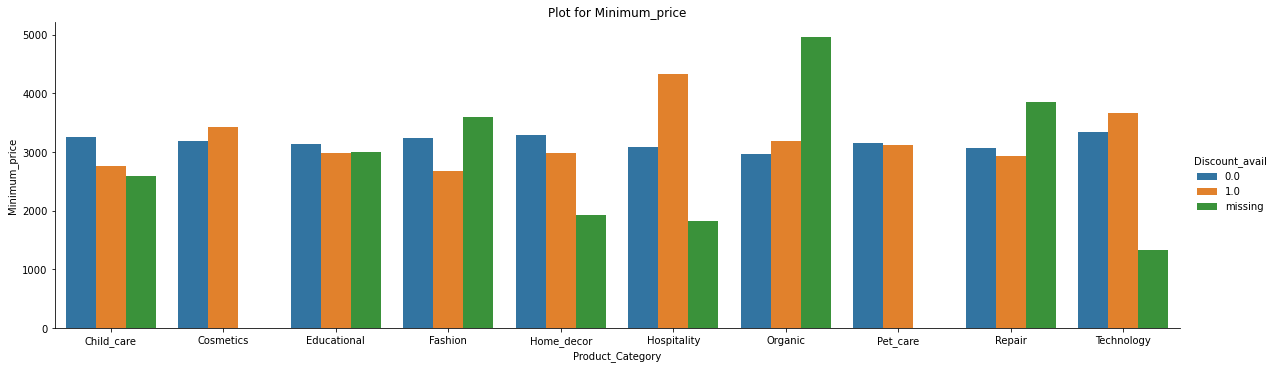

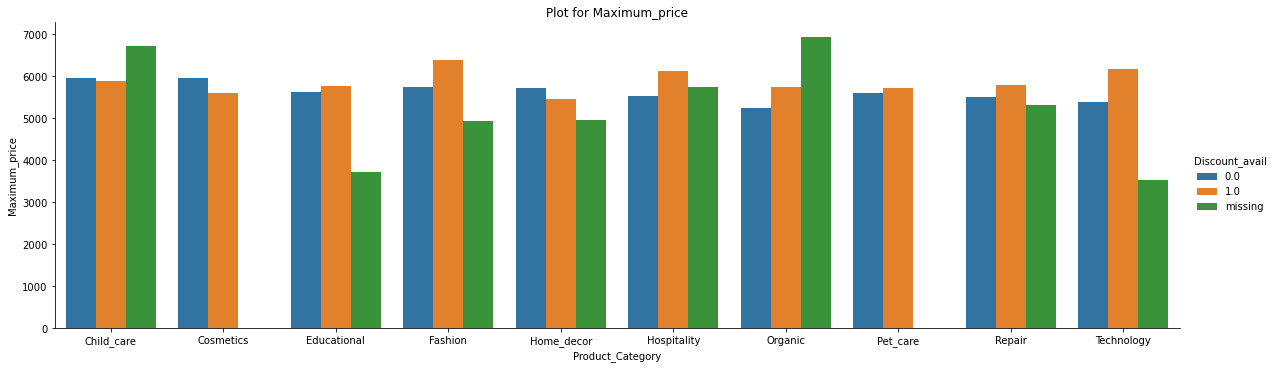

In [583]:
print(X_train.groupby(['Discount_avail','Product_Category']).agg(['count','median'])[['Minimum_price','Maximum_price']])

df = X_train.groupby(['Discount_avail','Product_Category']).median()[['Minimum_price','Maximum_price']].reset_index()
for var in ['Minimum_price','Maximum_price']:
    sns.factorplot(x = 'Product_Category' , y = var, data = df, hue = 'Discount_avail',kind = 'bar',aspect=20/6)
    plt.title(f'Plot for {var}')
    plt.show()

In [584]:
print(X_train.groupby('Product_Category').agg(['count','median'])[['Minimum_price','Maximum_price']])

                 Minimum_price         Maximum_price        
                         count  median         count  median
Product_Category                                            
Child_care                 438  3199.0           411  5894.0
Cosmetics                  425  3223.0           401  5873.0
Educational                388  3083.0           365  5600.0
Fashion                    409  3172.0           385  5744.0
Home_decor                 426  3248.0           404  5633.0
Hospitality                403  3166.0           385  5621.0
Organic                    416  3028.0           403  5309.0
Pet_care                   448  3137.0           434  5614.5
Repair                     432  3056.5           409  5558.0
Technology                 420  3347.5           393  5451.0


- first we need to see the correlation between other variables with maximum and mi9nimum prices and take those variables with high absolute correlation.But here most of the variables are categorical and as price is continuous so we can not measure true association via correlation and we have to use correlation ratio or some other metrics. Here we can see also that no variable is highly correlated with these twovariables. SDo we will try different variables by grouping to see some pattern.
- if we see the prvious graphs and tables for maximum and minimum prices across different variables we can notice that based on grade different product categry has different maximum and minimum values.
- We can use discount also but as missing value is there in discount variable so it is quite obvious that we can lose many information where missing value is handled for discount variable.

In [585]:
minimum_dict = X_train.groupby(['Grade','Product_Category']).median()['Minimum_price'].to_dict()
maximum_dict = X_train.groupby(['Grade','Product_Category']).median()['Maximum_price'].to_dict()

In [586]:
for var,dictionary in zip(['Minimum_price','Maximum_price'],[minimum_dict,maximum_dict]):
    for row in list(X_train[X_train[var].isna()].index):
        for row_dict in range(len(list(dictionary.keys()))):
            if (X_train.loc[row,'Grade'] == list(dictionary.keys())[row_dict][0]) and (X_train.loc[row,'Product_Category'] == list(dictionary.keys())[row_dict][1]):
                    X_train.loc[row,var] = list(dictionary.values())[row_dict]
        

In [587]:
# # Now we impute these median values (as these values have outliers) in minimum and maximum price 
# X_train['Minimum_price'] = X_train['Minimum_price'].fillna(X_train['Minimum_price'].median())
# X_train['Maximum_price'] = X_train['Maximum_price'].fillna(X_train['Maximum_price'].median())

# X_test['Minimum_price'] = X_test['Minimum_price'].fillna(X_test['Minimum_price'].median())
# X_test['Maximum_price'] = X_test['Maximum_price'].fillna(X_test['Maximum_price'].median())

In [588]:
# X_train['charges_1_new'] = X_train['charges_1'].apply(lambda x: np.nan if math.isnan(x) else 1 if x > 400 else 0)
# X_test['charges_1_new'] = X_test['charges_1'].apply(lambda x: np.nan if math.isnan(x) else 1 if x > 400 else 0)

In [589]:
# X_train.drop(['charges_1'],axis = 1,inplace= True)
# X_test.drop(['charges_1'],axis = 1,inplace= True)

In [590]:
X_train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,charges_2_missing
63,BRAEGJFZYEW2BMFJ,14.0,2016-03-29 21:55:43.000,38,Khalessi,Yes,Educational,3,49,0,152.0,12.0,4198.0,8015.0,0
5537,TOPECUYT94HVHCCA,44.0,2015-05-07 17:13:23.000,443,Maliyah,Yes,Fashion,0,5,0,356.0,16.0,4455.0,6361.0,0
2813,PCSE76X4HR9QNNJH,44.0,2016-03-14 05:40:07.000,452,Natalyn,No,Pet_care,0,97,1,120.0,3.0,6096.0,8246.0,0
4814,BRAEBUG2K3G2JYAQ,40.0,2015-08-19 17:36:36.000,23,Geneva,No,Technology,2,67,0,599.0,7.0,818.0,4335.0,0
684,NKCDYRHGFNBQ27UZ,26.0,2015-10-19 08:15:25.000,452,Lizette,No,Pet_care,0,93,0,182.0,7.0,3373.0,4617.0,0


In [591]:
X_train.isna().sum()

Product_id             0
Stall_no               0
instock_date           0
Market_Category        0
Customer_name        131
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1            131
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
charges_2_missing      0
dtype: int64

In [592]:
minimum_dict_test = X_test.groupby(['Grade','Product_Category']).median()['Minimum_price'].to_dict()
maximum_dict_test = X_test.groupby(['Grade','Product_Category']).median()['Maximum_price'].to_dict()

In [593]:
for var,dictionary in zip(['Minimum_price','Maximum_price'],[minimum_dict_test,maximum_dict_test]):
    for row in list(X_test[X_test[var].isna()].index):
        for row_dict in range(len(list(dictionary.keys()))):
            if (X_test.loc[row,'Grade'] == list(dictionary.keys())[row_dict][0]) and (X_test.loc[row,'Product_Category'] == list(dictionary.keys())[row_dict][1]):
                    X_test.loc[row,var] = list(dictionary.values())[row_dict]
        

In [594]:
X_test.isna().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name        75
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1            66
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
charges_2_missing     0
dtype: int64

#### Charges_1

In [595]:
X_train.groupby(['Product_Category']).agg(['count','median'])['charges_1']

,count,median
Product_Category,,
Child_care,426,301.5
Cosmetics,416,253.0
Educational,380,136.0
Fashion,392,374.0
Home_decor,407,254.0
Hospitality,387,274.0
Organic,408,124.0
Pet_care,445,150.0
Repair,421,244.0


- As we can see charges_1 differs quite a lot for different product categories despite of having similar no. of counts.

In [596]:
X_train.groupby(['Grade']).agg(['count','median'])['charges_1']

,count,median
Grade,,
0,2813,255.0
1,255,256.0
2,706,246.0
3,321,254.0


- As we can see for other variables except product_categry charges_1 is quite imbalanced (imbalanced data means somewhere one class is quite high in number and somewhere it is quite low that can not be used for generalisation as less data does not imply less priority)  in count and the variation is not captured well also so we will go with product_category to impute charges_1 values.


In [597]:
charges_1_dict = X_train.groupby(['Product_Category']).median()['charges_1'].to_dict()
charges_1_dict

{'Child_care': 301.5,
 'Cosmetics': 253.0,
 'Educational': 136.0,
 'Fashion': 374.0,
 'Home_decor': 254.0,
 'Hospitality': 274.0,
 'Organic': 124.0,
 'Pet_care': 150.0,
 'Repair': 244.0,
 'Technology': 560.0}

In [598]:
for row in list(X_train[X_train['charges_1'].isna()].index):
    for key in list(charges_1_dict.keys()):
        if  X_train.loc[row,'Product_Category'] == key:
            X_train.loc[row,'charges_1'] = charges_1_dict[key]
            
            
            
charges_1_dict_test = X_test.groupby(['Product_Category']).median()['charges_1'].to_dict()

for row in list(X_test[X_test['charges_1'].isna()].index):
    for key in list(charges_1_dict_test.keys()):
        if  X_test.loc[row,'Product_Category'] == key:
            X_test.loc[row,'charges_1'] = charges_1_dict_test[key]

In [599]:
# X_train['charges_1_new'] = X_train['charges_1_new'].fillna(X_train['charges_1_new'].mode()[0])
# X_test['charges_1_new'] = X_test['charges_1_new'].fillna(X_test['charges_1_new'].mode()[0])

In [600]:
X_train.isna().sum()

Product_id             0
Stall_no               0
instock_date           0
Market_Category        0
Customer_name        131
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
charges_2_missing      0
dtype: int64

In [601]:
X_test.isna().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name        75
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
charges_2_missing     0
dtype: int64

#### Categorical data handling

In [602]:
X_train.drop(['Product_id','Customer_name'],axis = 1,inplace = True)
X_test.drop(['Product_id','Customer_name'],axis = 1,inplace = True)

In [603]:
# stall_freq_dict_train = X_train['Stall_no'].value_counts().to_dict()
# stall_freq_dict_train

In [604]:
# !pip install category_encoders
from category_encoders import *

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['city'],return_df=True)

In [605]:
enc = BinaryEncoder(cols=['Stall_no'],return_df=True)
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

In [606]:
# X_train['Stall_no'] = X_train['Stall_no'].map(stall_freq_dict_train)

In [607]:
X_train.head()

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,charges_2_missing
63,0,0,0,0,0,0,1,2016-03-29 21:55:43.000,38,Yes,Educational,3,49,0,152.0,12.0,4198.0,8015.0,0
5537,0,0,0,0,0,1,0,2015-05-07 17:13:23.000,443,Yes,Fashion,0,5,0,356.0,16.0,4455.0,6361.0,0
2813,0,0,0,0,0,1,0,2016-03-14 05:40:07.000,452,No,Pet_care,0,97,1,120.0,3.0,6096.0,8246.0,0
4814,0,0,0,0,0,1,1,2015-08-19 17:36:36.000,23,No,Technology,2,67,0,599.0,7.0,818.0,4335.0,0
684,0,0,0,0,1,0,0,2015-10-19 08:15:25.000,452,No,Pet_care,0,93,0,182.0,7.0,3373.0,4617.0,0


In [608]:
X_test.head()

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,charges_2_missing
1910,0,0,0,1,0,0,0,2016-03-28 20:04:58.000,294,Yes,Hospitality,2,79,0,291.0,11.0,2810.0,4945.0,0
353,0,0,0,0,0,1,1,2015-09-26 14:26:58.000,108,Yes,Child_care,0,65,0,272.0,15.0,1069.0,2290.0,0
1512,0,0,0,1,0,0,0,2016-03-05 01:46:50.000,3,No,Child_care,0,23,1,310.0,9.0,2822.0,4968.0,0
5870,0,1,0,1,1,1,0,2015-05-06 14:10:47.000,103,No,Hospitality,0,16,0,328.0,11.0,6281.0,9126.0,0
604,0,0,1,1,0,1,1,2015-08-18 23:25:22.000,443,No,Child_care,0,35,0,340.0,11.0,5884.0,8138.0,0


In [609]:
# stall_freq_dict_test = X_test['Stall_no'].value_counts().to_dict()
# stall_freq_dict_test

In [610]:
# X_test['Stall_no'] = X_test['Stall_no'].map(stall_freq_dict_test)

In [611]:
X_train_indices = X_train.index
X_test_indices = X_test.index

df = pd.concat([X_train,X_test],axis = 0)

df = pd.get_dummies(df,columns=['Loyalty_customer','Product_Category','Discount_avail'],drop_first= True)

df['hour'] = df['instock_date'].apply(lambda x: x[10:13])
df.drop(['instock_date'],axis = 1, inplace = True)

X_train = df.loc[X_train_indices,:]
X_test = df.loc[X_test_indices,:]

In [612]:
X_train

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,Market_Category,Grade,Demand,...,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Discount_avail_1.0,Discount_avail_missing,hour
63,0,0,0,0,0,0,1,38,3,49,...,0,0,0,0,0,0,0,0,0,21
5537,0,0,0,0,0,1,0,443,0,5,...,1,0,0,0,0,0,0,0,0,17
2813,0,0,0,0,0,1,0,452,0,97,...,0,0,0,0,1,0,0,1,0,05
4814,0,0,0,0,0,1,1,23,2,67,...,0,0,0,0,0,0,1,0,0,17
684,0,0,0,0,1,0,0,452,0,93,...,0,0,0,0,1,0,0,0,0,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,0,0,0,1,1,0,0,448,0,63,...,0,0,0,1,0,0,0,0,0,13
5244,0,0,0,0,0,0,1,451,0,39,...,0,0,0,0,1,0,0,0,0,03
5279,0,0,1,0,0,0,1,358,3,64,...,0,0,0,0,0,0,1,0,0,20
5445,0,0,0,1,0,0,0,447,0,1,...,0,0,0,0,0,0,1,0,1,17


In [613]:
hour_freq_dict = X_train['hour'].value_counts().to_dict()
hour_freq_dict

{' 17': 393,
 ' 16': 313,
 ' 15': 299,
 ' 21': 298,
 ' 20': 293,
 ' 14': 285,
 ' 13': 271,
 ' 19': 260,
 ' 23': 219,
 ' 22': 208,
 ' 05': 175,
 ' 04': 160,
 ' 06': 147,
 ' 00': 143,
 ' 03': 141,
 ' 07': 138,
 ' 18': 122,
 ' 01': 114,
 ' 02': 107,
 ' 08': 59,
 ' 12': 22,
 ' 09': 21,
 ' 10': 19,
 ' 11': 19}

In [614]:
X_train['hour'] = X_train['hour'].map(hour_freq_dict)
X_test['hour'] = X_test['hour'].map(hour_freq_dict)

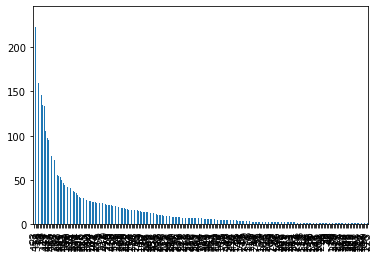

In [615]:
X_train['Market_Category'].value_counts().plot(kind = 'bar')

In [616]:
# market_cat_freq_dict = X_train['Market_Category'].value_counts().to_dict()
# market_cat_freq_dict

In [617]:
# X_train['Market_Category'] = X_train['Market_Category'].map(market_cat_freq_dict)

In [618]:
# # test data
# for row in list(X_test.index):
#     for key in list(market_cat_freq_dict.keys()):
#         try:
#             if X_test.loc[row,'Market_Category'] == key:
#                 X_test.loc[row,'Market_Category'] = market_cat_freq_dict[key]
#         except:
#             X_test.loc[row,'Market_Category'] = 0

In [619]:
enc_market = BinaryEncoder(cols=['Market_Category'],return_df=True)
X_train = enc_market.fit_transform(X_train)
X_test = enc_market.transform(X_test)

In [620]:
X_train.head()

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,Market_Category_0,Market_Category_1,Market_Category_2,...,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Discount_avail_1.0,Discount_avail_missing,hour
63,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,298
5537,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,393
2813,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,175
4814,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,393
684,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,59


In [621]:
X_test.tail()

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,Market_Category_0,Market_Category_1,Market_Category_2,...,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Discount_avail_1.0,Discount_avail_missing,hour
5100,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,107
136,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,299
4093,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,285
4920,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,285
2505,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122


In [622]:
X_train['ref_price'] = (X_train['Minimum_price'] + X_train['Maximum_price'])/2
X_test['ref_price'] = (X_test['Minimum_price'] + X_test['Maximum_price'])/2

X_train.drop(['Minimum_price', 'Maximum_price'],axis = 1,inplace = True)
X_test.drop(['Minimum_price', 'Maximum_price'],axis = 1,inplace = True)

In [623]:
X_train.columns

Index(['Stall_no_0', 'Stall_no_1', 'Stall_no_2', 'Stall_no_3', 'Stall_no_4',
       'Stall_no_5', 'Stall_no_6', 'Market_Category_0', 'Market_Category_1',
       'Market_Category_2', 'Market_Category_3', 'Market_Category_4',
       'Market_Category_5', 'Market_Category_6', 'Market_Category_7',
       'Market_Category_8', 'Grade', 'Demand', 'charges_1', 'charges_2 (%)',
       'charges_2_missing', 'Loyalty_customer_Yes',
       'Product_Category_Cosmetics', 'Product_Category_Educational',
       'Product_Category_Fashion', 'Product_Category_Home_decor',
       'Product_Category_Hospitality', 'Product_Category_Organic',
       'Product_Category_Pet_care', 'Product_Category_Repair',
       'Product_Category_Technology', 'Discount_avail_1.0',
       'Discount_avail_missing', 'hour', 'ref_price'],
      dtype='object')

#### outlier checking

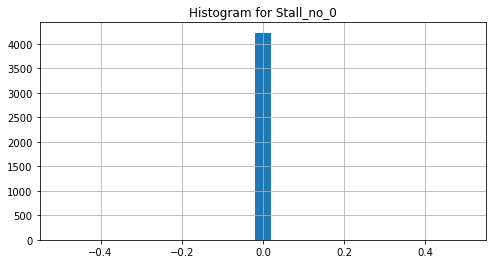

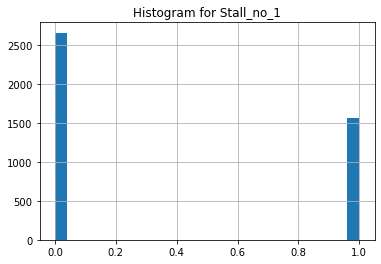

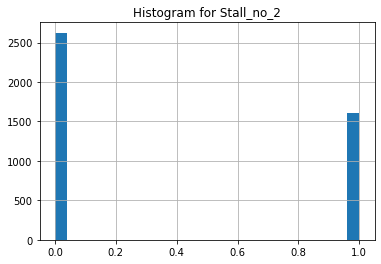

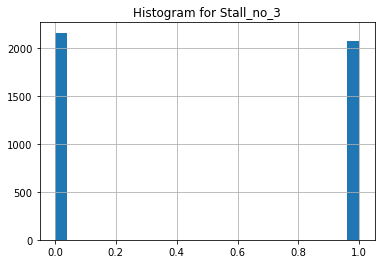

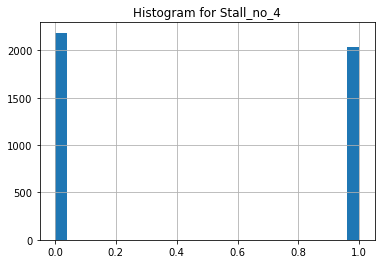

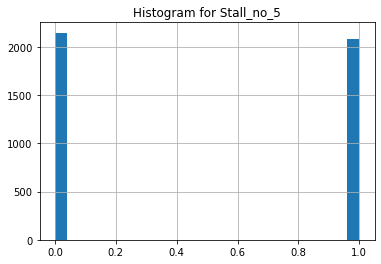

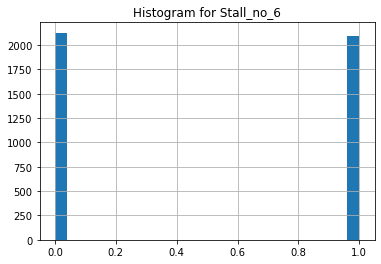

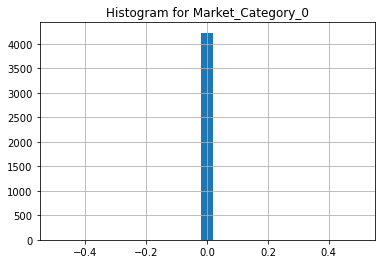

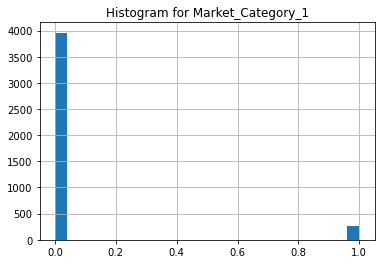

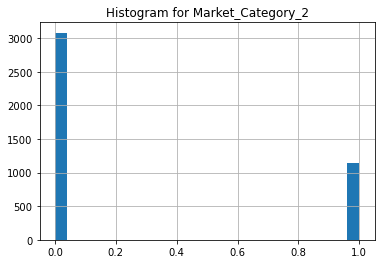

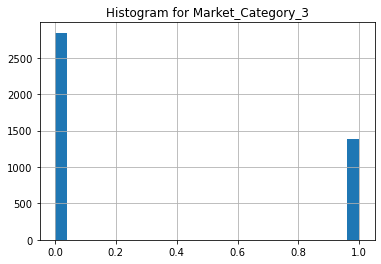

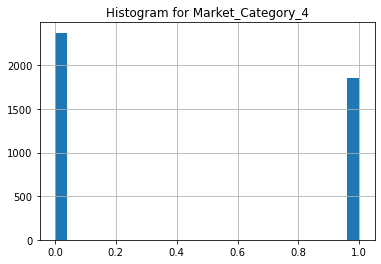

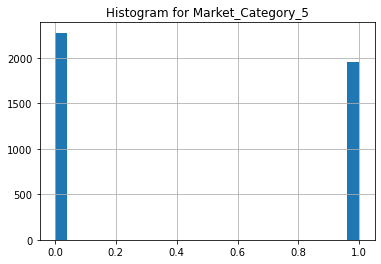

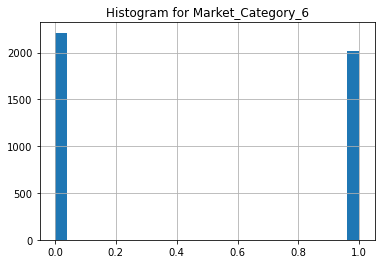

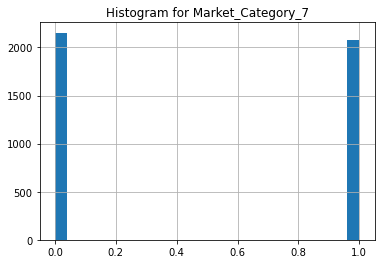

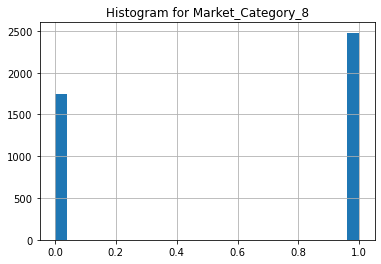

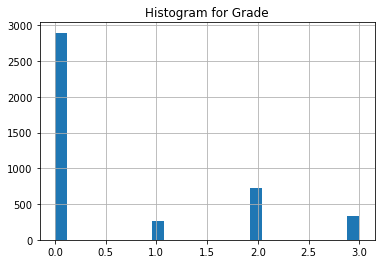

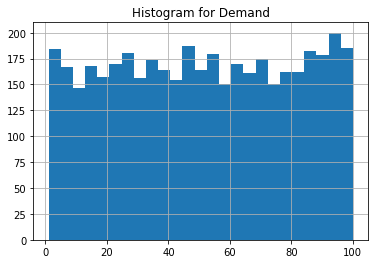

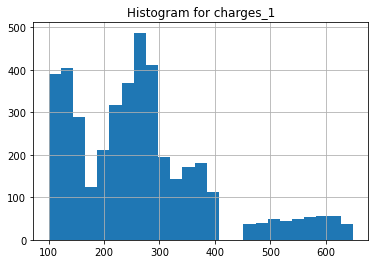

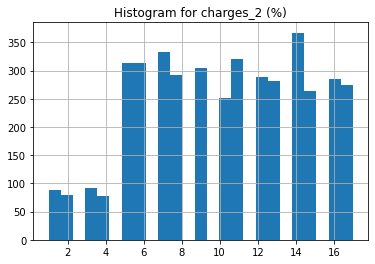

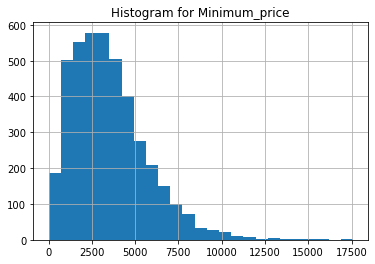

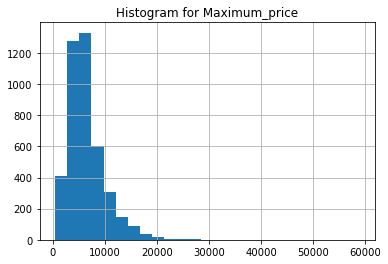

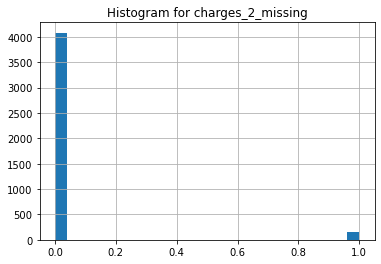

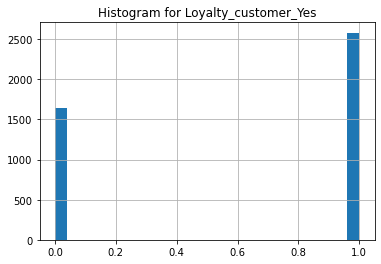

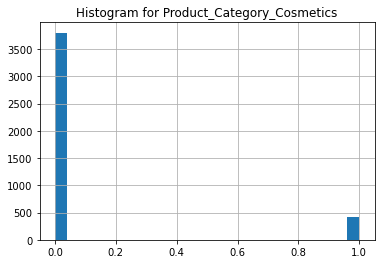

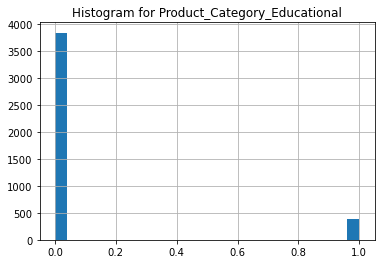

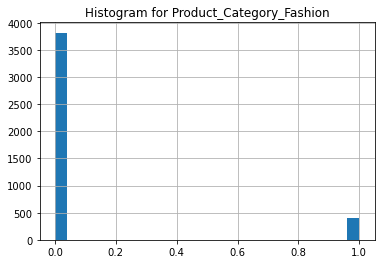

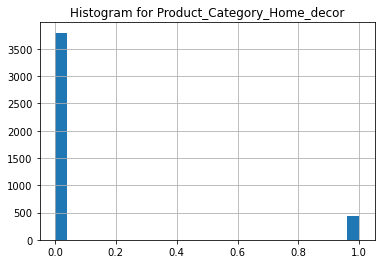

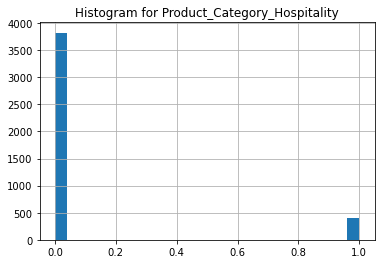

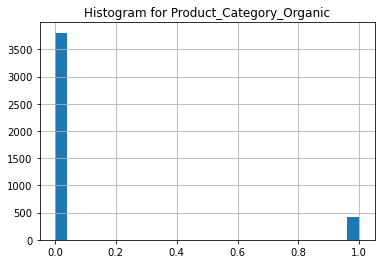

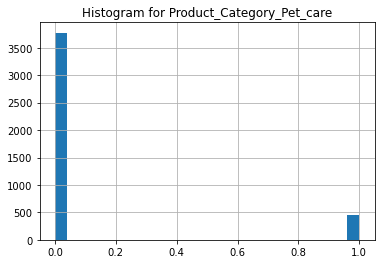

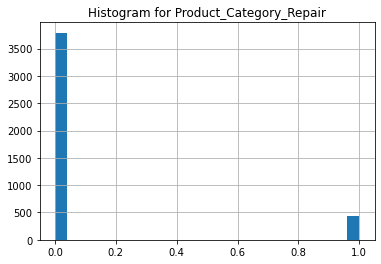

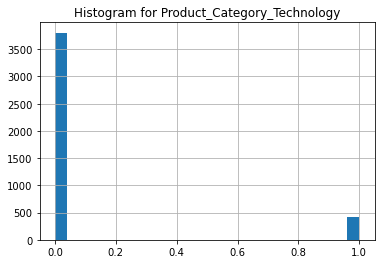

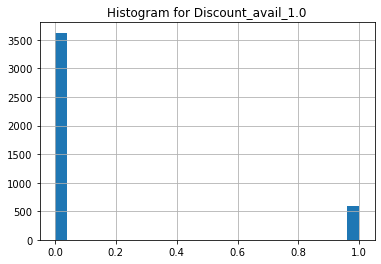

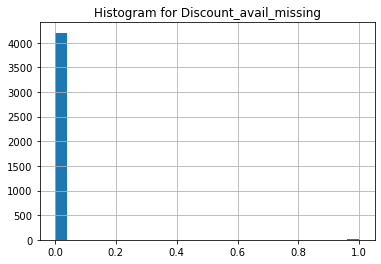

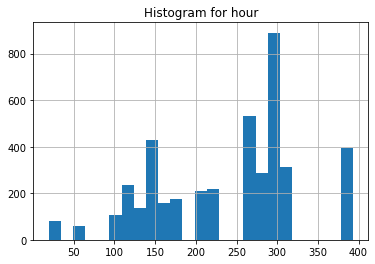

In [412]:
fig = plt.figure(figsize = (8,4))
for var in X_train.columns:
    X_train[var].hist(bins= 25)
    plt.title(f'Histogram for {var}')
    plt.show()

In [624]:
# We can see so many outliers for maximum and minimum price
# for var in ['Maximum_price','Minimum_price','charges_1']:
for var in ['ref_price','charges_1']:
    Q1 = X_train[var].quantile(.25)
    Q3 = X_train[var].quantile(.75)
    IQR = Q3 - Q1
    upper_range = Q3 + (2*IQR)
    lower_range = Q1 - (2*IQR)
    
    print(f"upper range for {var} is {upper_range}")
    print(f"lower range for {var} is {lower_range}")
    
    # As these are positively skewed so we can find outliers only in right tails
    X_train[var] = X_train[var].apply(lambda x: upper_range if x > upper_range else x)
    X_test[var] = X_test[var].apply(lambda x: upper_range if x > upper_range else x)

upper range for ref_price is 12334.75
lower range for ref_price is -3011.5
upper range for charges_1 is 625.0
lower range for charges_1 is -145.0


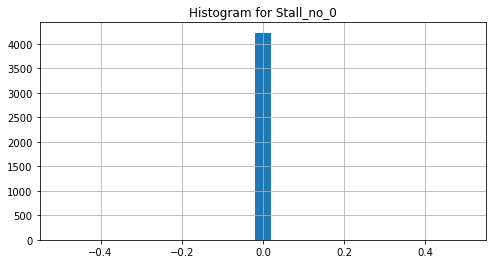

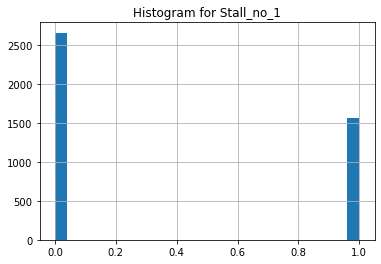

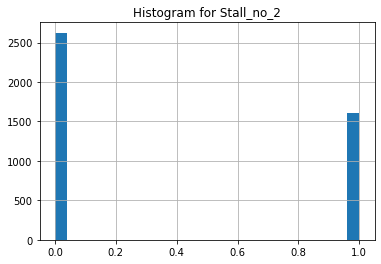

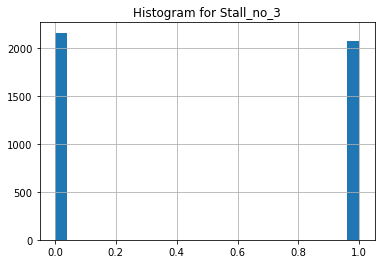

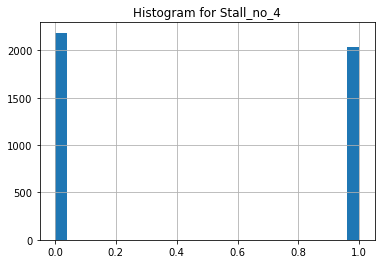

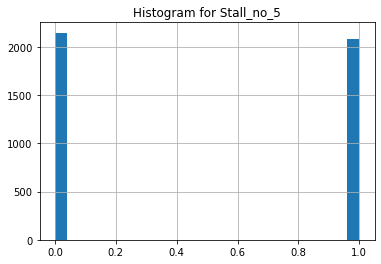

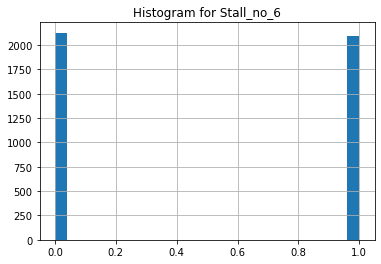

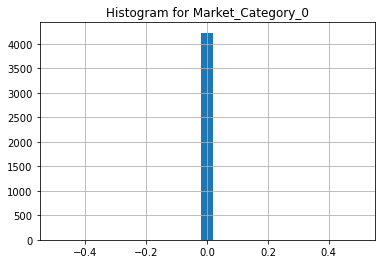

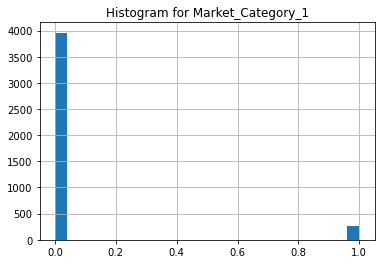

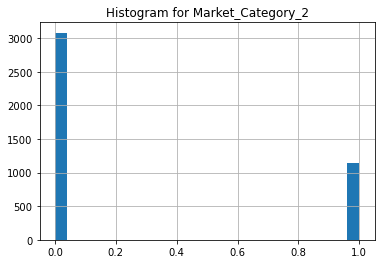

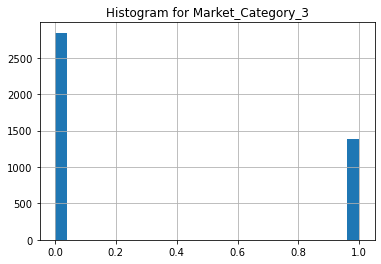

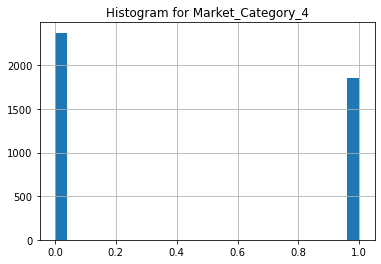

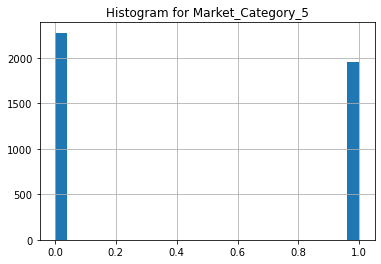

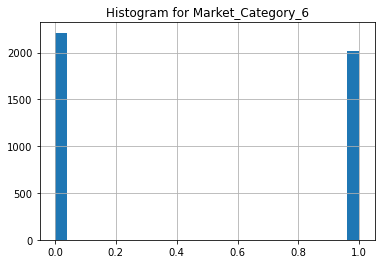

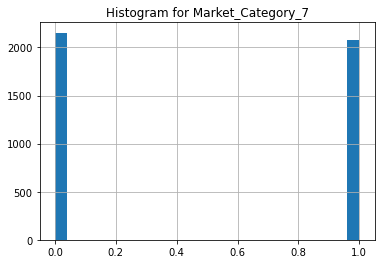

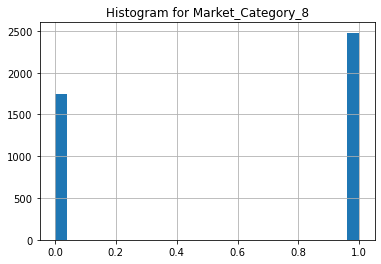

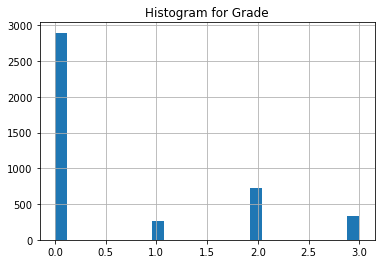

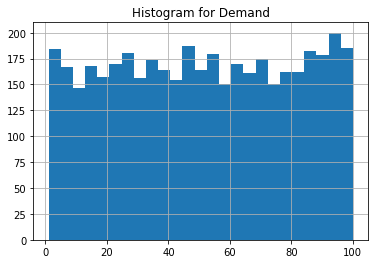

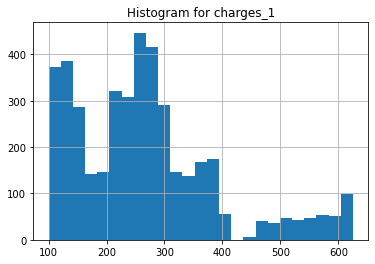

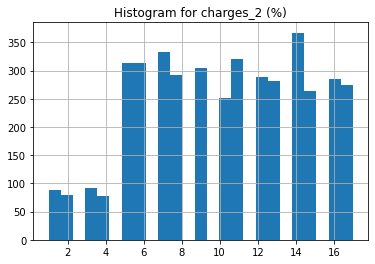

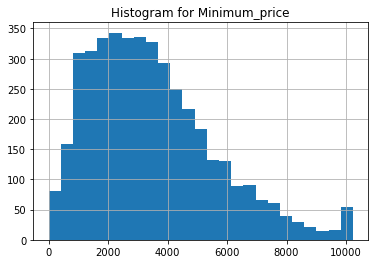

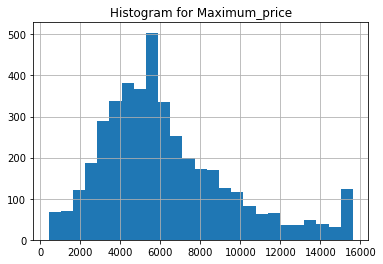

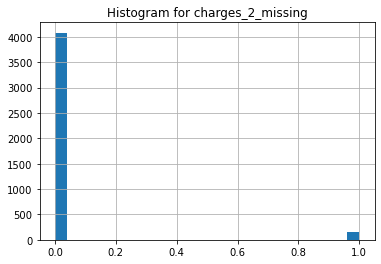

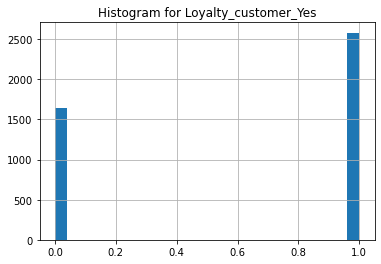

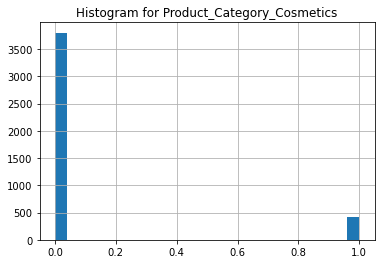

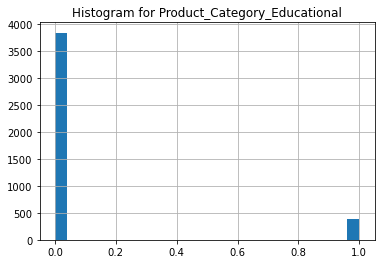

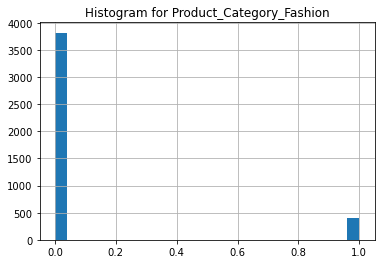

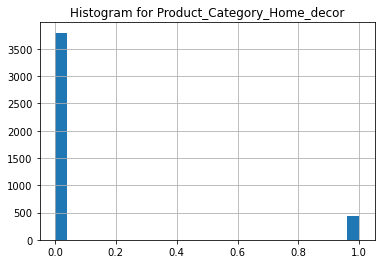

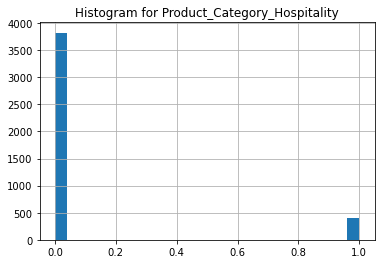

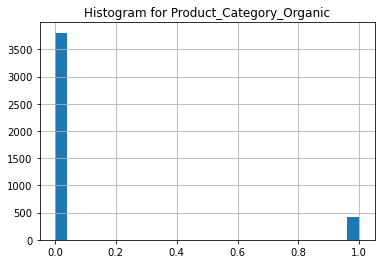

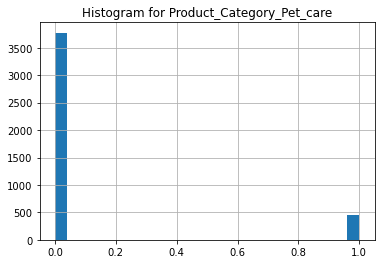

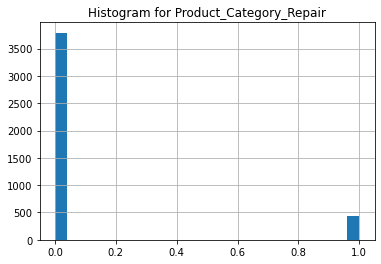

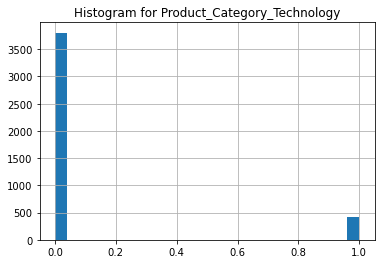

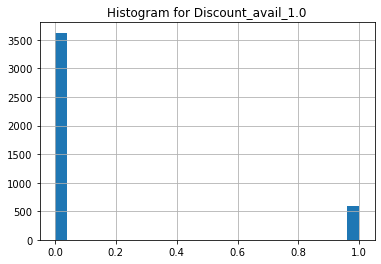

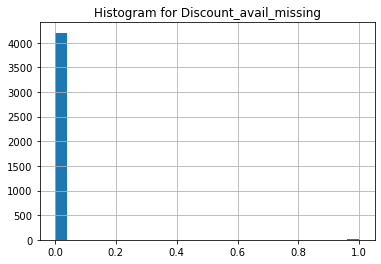

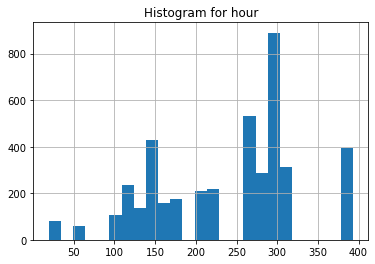

In [414]:
fig = plt.figure(figsize = (8,4))
for var in X_train.columns:
    X_train[var].hist(bins= 25)
    plt.title(f'Histogram for {var}')
    plt.show()

#### Feature Transformation

In [625]:
# for var in ['Discount_avail','charges_2 (%)']:
#     X_train[var] = X_train[var].astype('int')
#     X_test[var] = X_test[var].astype('int')
X_train['charges_2 (%)'] = X_train['charges_2 (%)'].astype('int')
X_test['charges_2 (%)'] = X_test['charges_2 (%)'].astype('int')


In [626]:
# X_train1 = X_train.copy()
# X_test1 = X_test.copy()

In [627]:

# X_train['Maximum_price'] = np.sqrt(X_train['Maximum_price'])
# X_train['Minimum_price'] = np.sqrt(X_train['Minimum_price'])
X_train['ref_price'] = np.sqrt(X_train['ref_price'])
X_train['charges_1'] = np.sqrt(X_train['charges_1'])

# X_test['Maximum_price'] = np.sqrt(X_test['Maximum_price'])
# X_test['Minimum_price'] = np.sqrt(X_test['Minimum_price'])
X_test['ref_price'] = np.sqrt(X_test['ref_price'])
X_test['charges_1'] = np.sqrt(X_test['charges_1'])

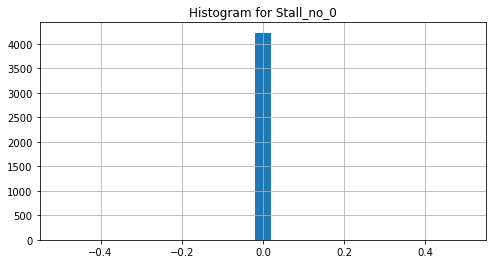

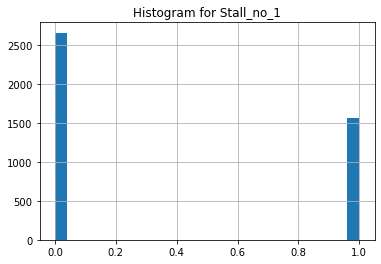

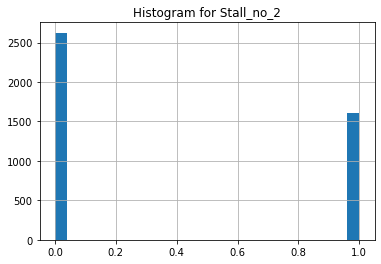

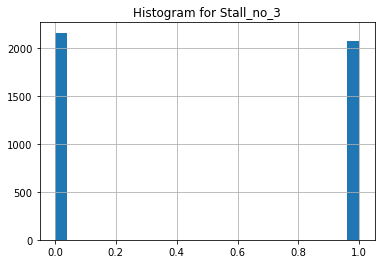

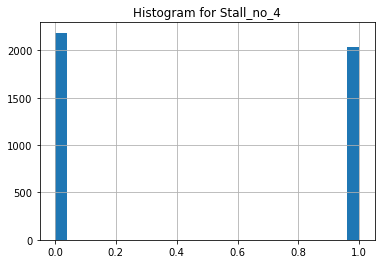

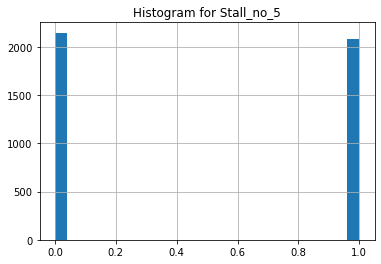

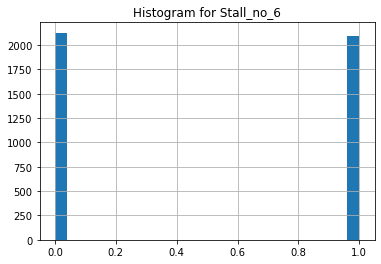

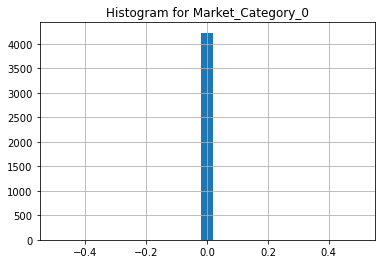

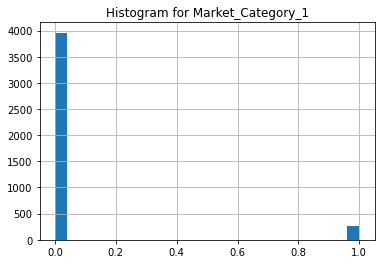

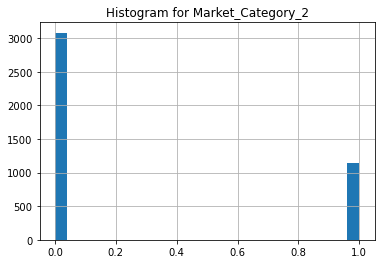

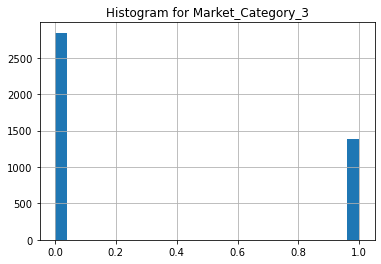

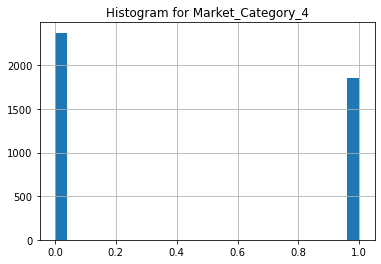

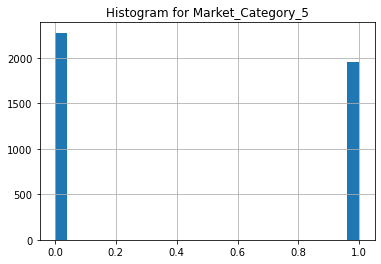

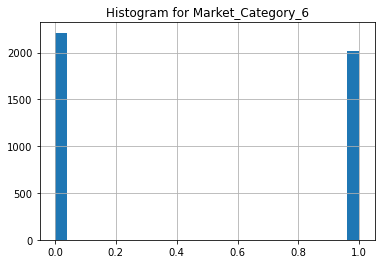

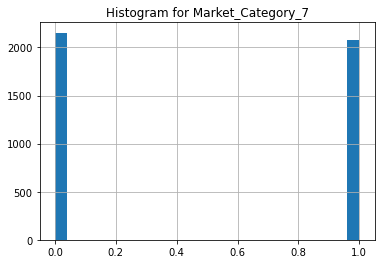

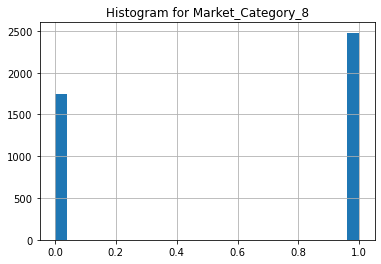

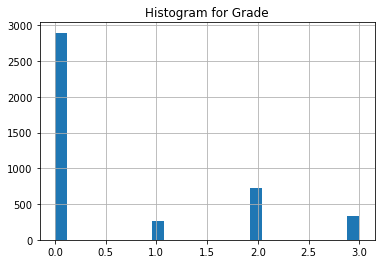

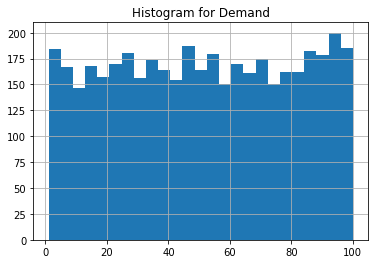

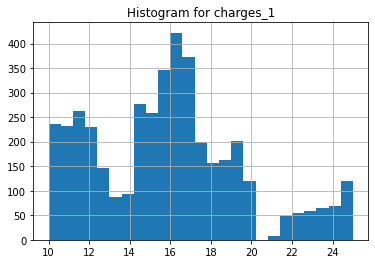

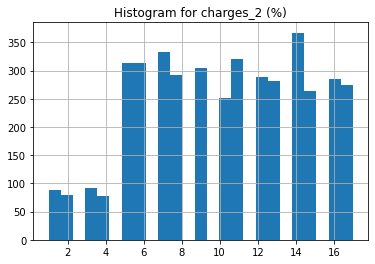

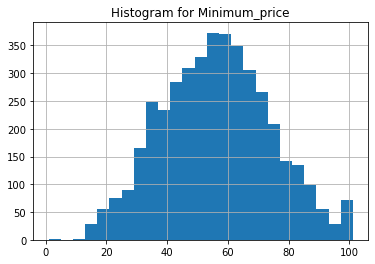

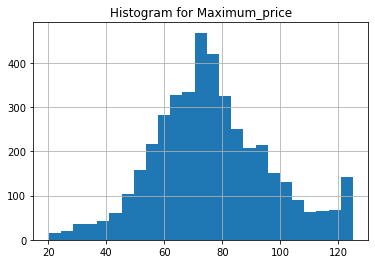

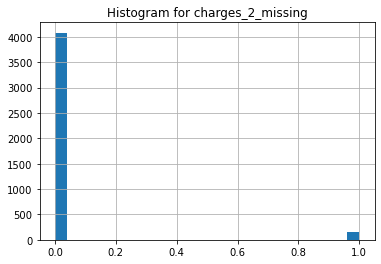

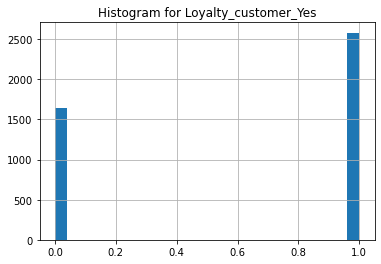

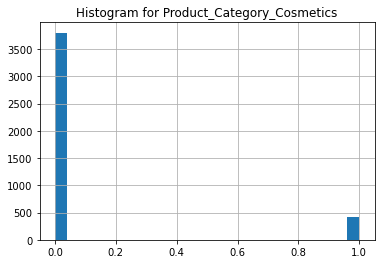

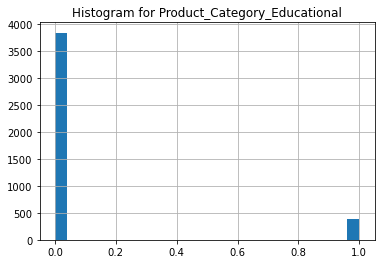

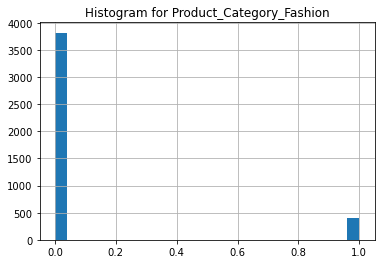

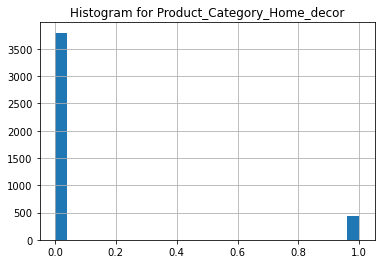

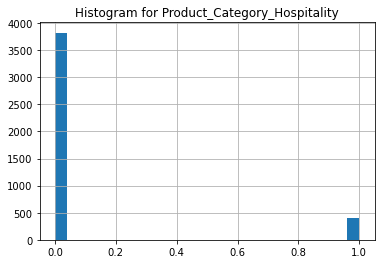

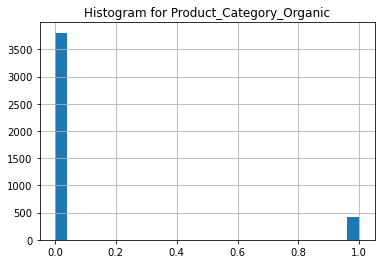

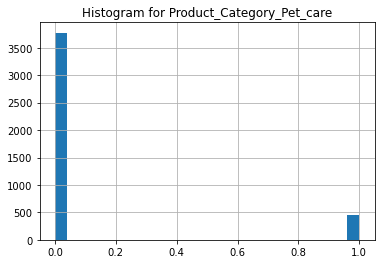

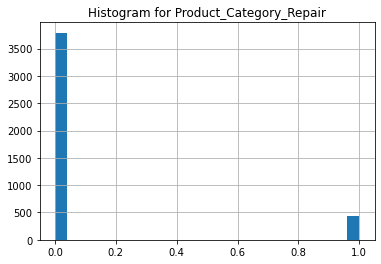

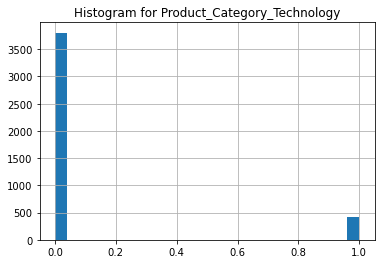

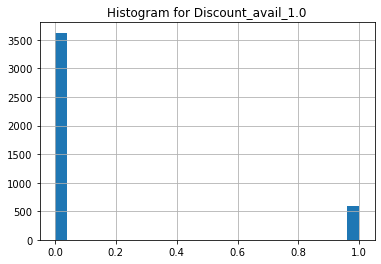

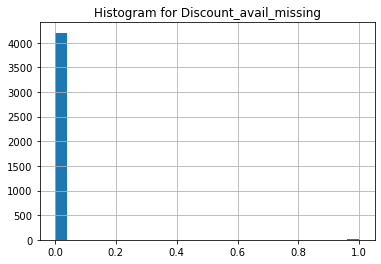

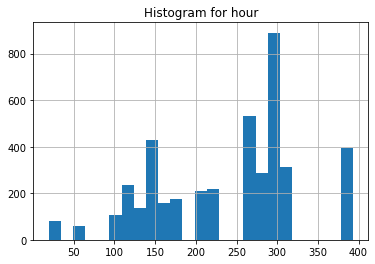

In [419]:
fig = plt.figure(figsize = (8,4))
for var in X_train.columns:
    X_train[var].hist(bins= 25)
    plt.title(f'Histogram for {var}')
    plt.show()

In [628]:
y_train = np.sqrt(y_train)
y_test = np.sqrt(y_test)

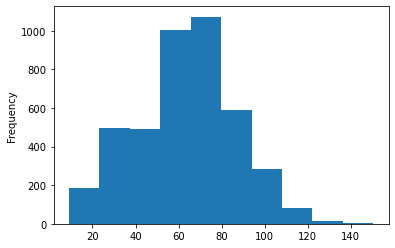

In [421]:
pd.Series(y_train).plot(kind = 'hist')

#### Scaling

In [629]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns= X_train.columns)

In [630]:
X_train.head()

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,Market_Category_0,Market_Category_1,Market_Category_2,...,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Discount_avail_1.0,Discount_avail_missing,hour,ref_price
0,0.0,-0.768061,-0.781357,-0.979389,-0.965571,-0.984502,1.007124,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,-0.345645,-0.338741,-0.333509,-0.406782,-0.073975,0.659120,0.584993
1,0.0,-0.768061,-0.781357,-0.979389,-0.965571,1.015741,-0.992926,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,-0.345645,-0.338741,-0.333509,-0.406782,-0.073975,1.727330,0.329570
2,0.0,-0.768061,-0.781357,-0.979389,-0.965571,1.015741,-0.992926,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,2.893145,-0.338741,-0.333509,2.458319,-0.073975,-0.723931,0.947615
3,0.0,-0.768061,-0.781357,-0.979389,-0.965571,1.015741,1.007124,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,-0.345645,-0.338741,2.998424,-0.406782,-0.073975,1.727330,-0.933951
4,0.0,-0.768061,-0.781357,-0.979389,1.035657,-0.984502,-0.992926,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,2.893145,-0.338741,-0.333509,-0.406782,-0.073975,-2.028271,-0.243571


In [631]:
X_test.head()

,Stall_no_0,Stall_no_1,Stall_no_2,Stall_no_3,Stall_no_4,Stall_no_5,Stall_no_6,Market_Category_0,Market_Category_1,Market_Category_2,...,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Discount_avail_1.0,Discount_avail_missing,hour,ref_price
0,0.0,-0.768061,-0.781357,1.021045,-0.965571,-0.984502,-0.992926,0.0,-0.259695,-0.609252,...,-0.336131,3.071574,-0.331314,-0.345645,-0.338741,-0.333509,-0.406782,-0.073975,0.602899,-0.295512
1,0.0,-0.768061,-0.781357,-0.979389,-0.965571,1.015741,1.007124,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,-0.345645,-0.338741,-0.333509,-0.406782,-0.073975,0.512944,-1.476278
2,0.0,-0.768061,-0.781357,1.021045,-0.965571,-0.984502,-0.992926,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,-0.345645,-0.338741,-0.333509,2.458319,-0.073975,-1.409834,-0.287727
3,0.0,1.301980,-0.781357,1.021045,1.035657,1.015741,-0.992926,0.0,-0.259695,1.641358,...,-0.336131,3.071574,-0.331314,-0.345645,-0.338741,-0.333509,-0.406782,-0.073975,0.512944,1.118886
4,0.0,-0.768061,1.279825,1.021045,-0.965571,1.015741,1.007124,0.0,-0.259695,-0.609252,...,-0.336131,-0.325566,-0.331314,-0.345645,-0.338741,-0.333509,-0.406782,-0.073975,-0.229181,0.894919


#### Feature Selection

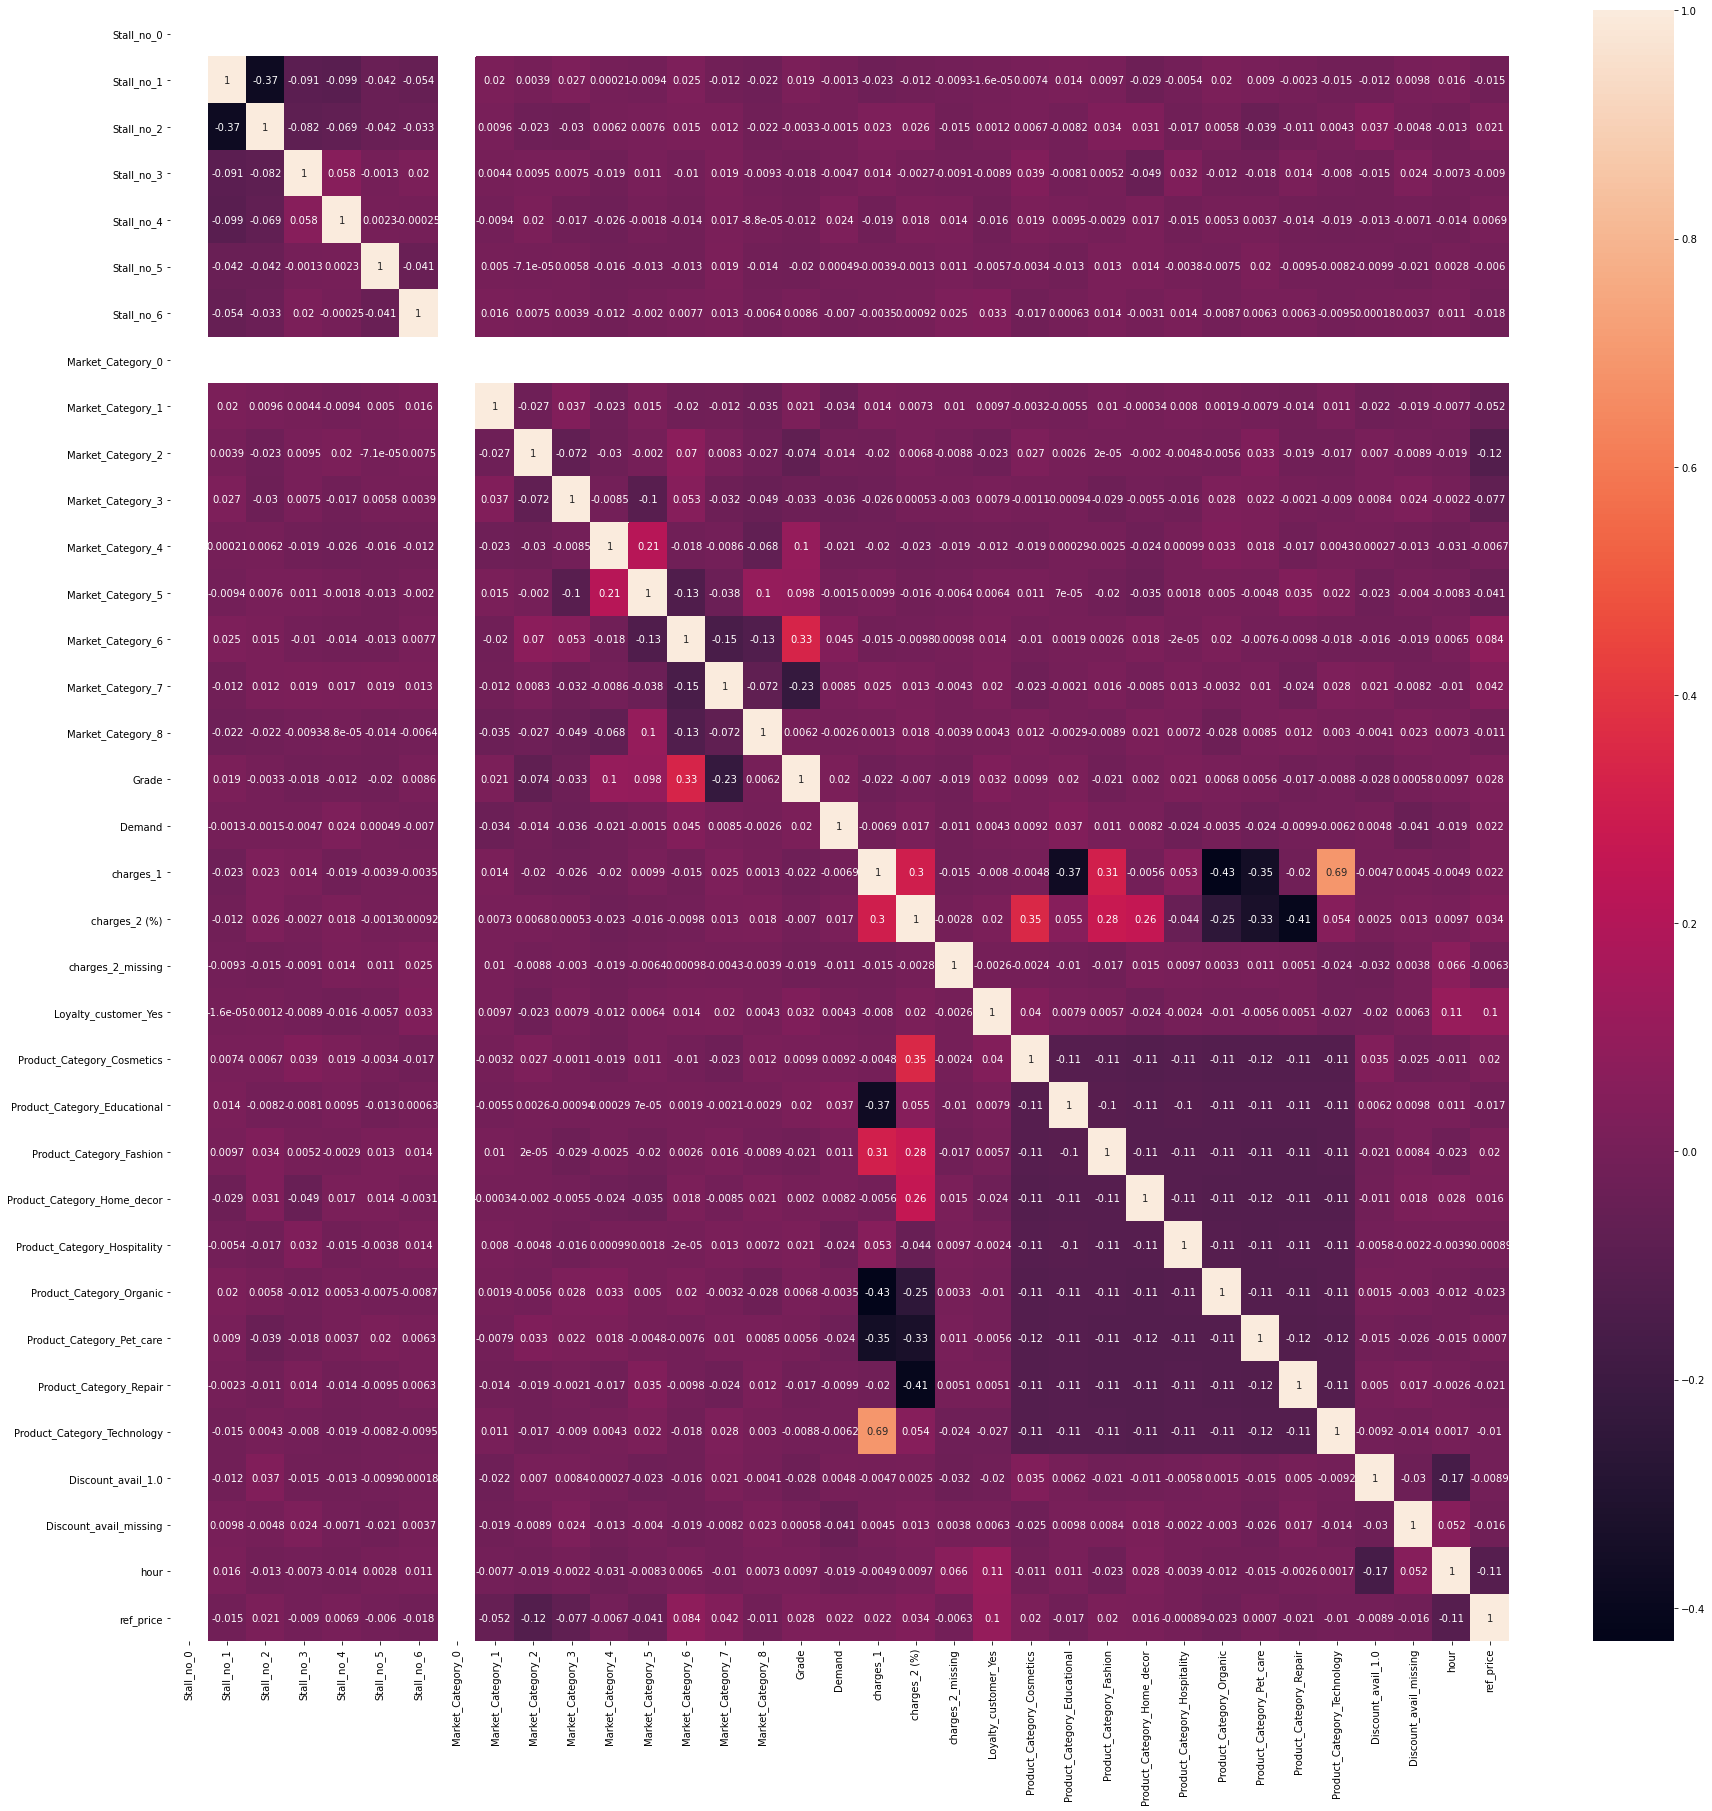

In [632]:
fig = plt.figure(figsize = (30,30))
cor = X_train.corr()
sns.heatmap(cor,annot= True)

In [636]:
X_train = X_train.drop('Product_Category_Technology',axis = 1)
X_test = X_test.drop('Product_Category_Technology',axis = 1)

In [637]:
# VIF checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values("VIF",axis = 0,ascending = False).reset_index(drop= "first")
    
    return(vif)

In [638]:
calc_vif(X_train)

,variables,VIF
0,charges_1,4.748507
1,Product_Category_Organic,4.174467
2,Product_Category_Pet_care,3.899510
3,Product_Category_Educational,3.558907
4,Product_Category_Repair,2.457763
5,charges_2 (%),2.256711
6,Product_Category_Cosmetics,2.154706
7,Product_Category_Home_decor,2.077913
8,Product_Category_Hospitality,1.802921
9,Product_Category_Fashion,1.459524


In [639]:
from sklearn.ensemble import ExtraTreesRegressor
ex_reg = ExtraTreesRegressor()
ex_reg.fit(X_train,y_train)
ex_reg.feature_importances_

array([0.00000000e+00, 4.44898712e-04, 4.78272083e-04, 4.11667142e-04,
       4.74241065e-04, 4.02107370e-04, 3.97453457e-04, 0.00000000e+00,
       6.43085166e-04, 1.19191220e-03, 6.29300658e-04, 1.03966949e-03,
       6.60015206e-04, 5.30508324e-04, 3.79250462e-04, 7.02798635e-04,
       3.16966011e-03, 7.65099962e-04, 2.38309070e-03, 8.27003792e-04,
       2.91640381e-04, 6.38640049e-04, 2.85356906e-04, 2.75921534e-04,
       2.55931676e-04, 6.36902731e-04, 5.41980419e-04, 3.80934724e-04,
       2.26403110e-04, 2.89470080e-04, 4.30556245e-01, 2.56356393e-03,
       7.03086504e-04, 5.46823888e-01])

In [640]:
df = pd.DataFrame({'Feature': list(X_train.columns), 'Score' : ex_reg.feature_importances_}).sort_values(by = 'Score',axis = 0,ascending = False).reset_index(drop= 'first')
df

,Feature,Score
0,ref_price,0.546824
1,Discount_avail_1.0,0.430556
2,Grade,0.003170
3,Discount_avail_missing,0.002564
4,charges_1,0.002383
5,Market_Category_2,0.001192
6,Market_Category_4,0.001040
7,charges_2 (%),0.000827
8,Demand,0.000765
9,hour,0.000703


In [641]:
cols = df.Feature[:2].to_list()
cols

['ref_price', 'Discount_avail_1.0']

In [500]:
cols_new = [var for var in X_train.columns if var not in ['Minimum_price','Maximum_price']]

In [643]:
X_train_subset = X_train[cols]
X_test_subset = X_test[cols]
X_train_subset.head()

,ref_price,Discount_avail_1.0
0,0.584993,-0.406782
1,0.329570,-0.406782
2,0.947615,2.458319
3,-0.933951,-0.406782
4,-0.243571,-0.406782


#### Model Selection

In [430]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [431]:
from sklearn.metrics import r2_score,mean_squared_error
lin_reg.score(X_train,y_train)

0.9533721762341473

In [432]:
mean_squared_error(y_train,lin_reg.predict(X_train))

24.138676387227918

In [433]:
predictions = lin_reg.predict(X_test)


In [434]:
r2_score(y_test,predictions)

0.949577425286304

In [435]:
mean_squared_error(y_test,predictions)

25.99050211078576

In [436]:
def adjus_r_sq(X,y,model):
    n = X.shape[0]
    k = X.shape[1]
    pred = model.predict(X)
    rsq = r2_score(y,pred)
    return 1 - ((1-rsq)*((n-1)/(n-k-1)))

In [437]:
adjus_r_sq(X_test,y_test,lin_reg)

0.9487148690228732

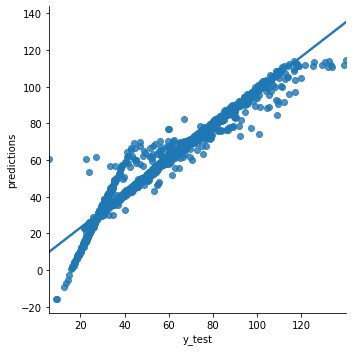

In [438]:
sns.lmplot('y_test','predictions',data = pd.DataFrame({"y_test" : y_test, "predictions" : predictions}))

In [439]:
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()

In [649]:
ran_for_reg

RandomForestRegressor()

In [650]:
ran_for_reg.fit(X_train,y_train)

RandomForestRegressor()

In [651]:
ran_for_reg.score(X_train,y_train)

0.9967936350123754

In [652]:
pred = ran_for_reg.predict(X_test)

In [653]:
r2_score(y_test,pred)

0.978748573442002

In [654]:
adjus_r_sq(X_test,y_test,ran_for_reg)

0.978395594202641

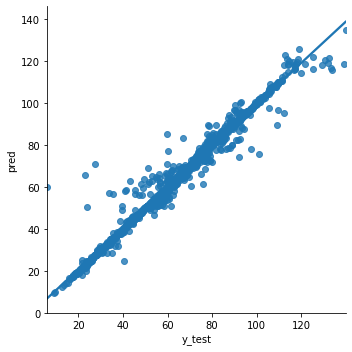

In [655]:
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test, "pred" : pred}))

In [656]:
mean_squared_error(y_test,pred)

10.954126201390293

In [644]:
ran_for_reg.fit(X_train_subset,y_train)

RandomForestRegressor()

In [645]:
ran_for_reg.score(X_train_subset,y_train)

0.9935978772447837

In [646]:
pred = ran_for_reg.predict(X_test_subset)

In [647]:
r2_score(y_test,pred)

0.9642528053127075

In [648]:
mean_squared_error(y_test,pred)

18.426023348672473

### Hyper parameter tuning


In [657]:
params = {'n_estimators' : [100,300,500,800,1000,1500],
         'min_samples_leaf' : [3,5,7,9],
         'min_samples_split' : [4,6,8,10,12],
         'max_depth' : [2,4,6,8,10]
         }

from sklearn.model_selection import RandomizedSearchCV


In [658]:
random_cv = RandomizedSearchCV(ran_for_reg,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000, 1500]},
                   verbose=1)

In [659]:
best_model = random_cv.best_estimator_
best_model

RandomForestRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=10,
                      n_estimators=1500)

In [673]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=10,
                      n_estimators=1500)

In [674]:
best_model.score(X_train,y_train)

0.9841742779486229

In [675]:
pred = best_model.predict(X_test)

In [676]:
r2_score(y_test,pred)

0.9794118248202238

In [677]:
mean_squared_error(y_test,pred)

10.612250832202255

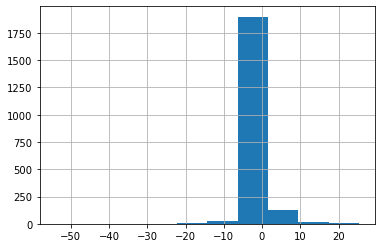

In [678]:
pd.Series(y_test - pred).hist()

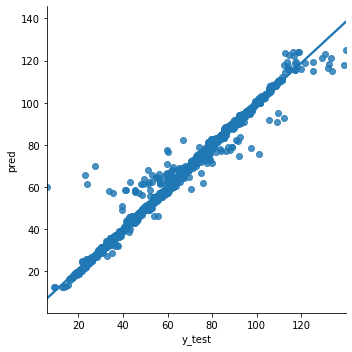

In [680]:
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test, "pred" : pred}))

In [665]:
random_cv1 = RandomizedSearchCV(ran_for_reg,param_distributions = params,n_jobs = -1,cv = 5, verbose = 1)
random_cv1.fit(X_train_subset,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'min_samples_split': [4, 6, 8, 10, 12],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000, 1500]},
                   verbose=1)

In [666]:
best_model1 = random_cv1.best_estimator_
best_model1

RandomForestRegressor(max_depth=6, min_samples_leaf=9, min_samples_split=8,
                      n_estimators=800)

In [672]:
print(best_model1.fit(X_train_subset,y_train))
pred1 = best_model1.predict(X_test_subset)
print(r2_score(y_test,pred1))
print(mean_squared_error(y_test,pred1))

RandomForestRegressor(max_depth=6, min_samples_leaf=9, min_samples_split=8,
                      n_estimators=800)
0.9783526604302094
11.158201023572802


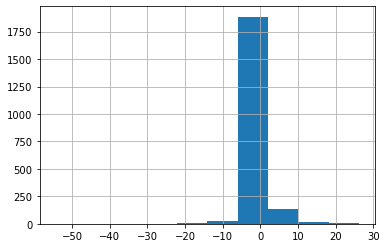

In [679]:
pd.Series(y_test - pred1).hist()

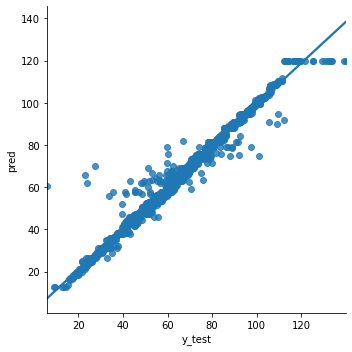

In [681]:
sns.lmplot('y_test','pred',data = pd.DataFrame({"y_test" : y_test, "pred" : pred1}))